NLP Final Project

Twitter Sentimental Analysis

Yasaman Shahrasbi

300203020

In [2]:
from google.colab import drive
import os
drive.mount('/content/gdrive')


os.chdir('/content/gdrive/My Drive/uOttawa/ForthSemester/NLP/Project/')

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Help Functions

## Convert function for neural network output layer

In [4]:
def convert(result):
  labels = np.argmax(result, axis=1)
  return labels

## A function to draw accuracy and loss function of training data and validation data

In [5]:
import matplotlib.pyplot as plt
def plot(history):
  history_dict = history.history
  print(history_dict)

  acc = history_dict['categorical_accuracy']
  val_acc = history_dict['val_categorical_accuracy']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(acc) + 1)
  fig = plt.figure(figsize=(10, 6))
  fig.tight_layout()

  plt.subplot(2, 1, 1)
  # r is for "solid red line"
  plt.plot(epochs, loss, 'r', label='Training loss')
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  # plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.subplot(2, 1, 2)
  plt.plot(epochs, acc, 'r', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')

## Calculate Weighted Average

In [30]:
def weighted_average(score0, score1, score2):
  return (score0 * 1134 + score1 * 1263 + score2 * 803)/ (1134 + 1263 + 803)

In [73]:
weighted_average(0.83, 0.83, 0.67)

0.7898499999999998

# Import Data

In [6]:
df_twitter = pd.read_csv('/content/gdrive/MyDrive/uOttawa/ForthSemester/NLP/Project/Datasets/Twitter_Data.csv')

In [7]:
df_twitter.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [8]:
df_twitter.shape, df_twitter.shape

((162980, 2), (162980, 2))

In [9]:
df_twitter = df_twitter.rename(columns={'clean_text': 'comment'})

In [10]:
X_twitter = np.array(df_twitter.comment)[0:10000]
y_twitter = np.array(df_twitter.category)[0:10000]

 Find nan in labels:

In [11]:
np.argwhere(np.isnan(y_twitter))

array([], shape=(0, 1), dtype=int64)

In [12]:
X_twitter = np.delete(X_twitter, np.argwhere(np.isnan(y_twitter)), axis=0)
y_twitter = np.delete(y_twitter, np.argwhere(np.isnan(y_twitter)), axis=0)

 Find nan in data:

In [13]:
idx_nan_data = []
for i in range(len(X_twitter)):
  if type(X_twitter[i]) != str: idx_nan_data.append(i)

In [14]:
idx_nan_data

[148]

In [15]:
y_twitter = np.delete(y_twitter, idx_nan_data, axis=0)
X_twitter = np.delete(X_twitter, idx_nan_data, axis=0)

In [16]:
X_twitter.shape, y_twitter.shape

((9999,), (9999,))

In [17]:
y_twitter[y_twitter == -1] = 2
y_twitter[y_twitter == -1] = 2

In [18]:
X_train_twitter, X_test_twitter, y_train_twitter, y_test_twitter = train_test_split(X_twitter, y_twitter, test_size=0.33, random_state=42)

In [24]:
pd.DataFrame(y_test_twitter).value_counts()

1.0    1363
0.0    1134
2.0     803
dtype: int64

In [19]:
X_train_twitter.shape, X_test_twitter.shape, y_train_twitter.shape, y_test_twitter.shape

((6699,), (3300,), (6699,), (3300,))

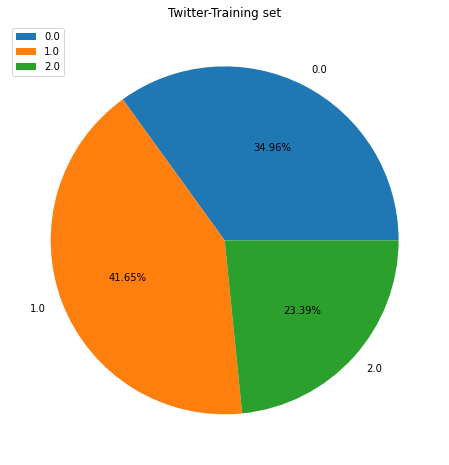

In [20]:
# pie chart distribution of normal and attack labels 
plt.figure(figsize=(8,8)) 
(unique, counts) = np.unique(y_train_twitter, return_counts=True)
plt.pie(counts,labels=unique,autopct='%0.2f%%') 
plt.title("Twitter-Training set") 
plt.legend() 
#plt.savefig('plots/Pie_chart_binary.png') 
plt.show()

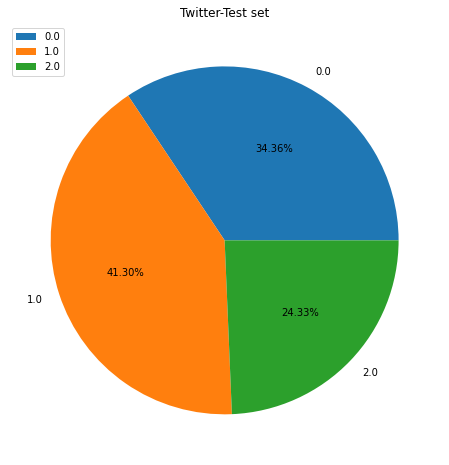

In [21]:
# pie chart distribution of normal and attack labels 
plt.figure(figsize=(8,8)) 
(unique, counts) = np.unique(y_test_twitter, return_counts=True)
plt.pie(counts,labels=unique,autopct='%0.2f%%') 
plt.title("Twitter-Test set") 
plt.legend() 
#plt.savefig('plots/Pie_chart_binary.png') 
plt.show()

In [22]:
(unique, counts) = np.unique(y_twitter, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[0.000e+00, 3.476e+03],
       [1.000e+00, 4.153e+03],
       [2.000e+00, 2.370e+03]])

# Part One

## Preprocessing

### 1. Lemmatization



In [ ]:
import spacy

def lemmatize (data):
  # Initialize spacy 'en' model, keeping only tagger component needed for lemmatization
  nlp = spacy.load('en', disable=['parser', 'ner'])
  nlp.max_length = 14000000
  contents_lemmatized = [token.lemma_.lower() if token.lemma_ != '-PRON-' else token.lower_ for token in nlp(data)]
  return contents_lemmatized

In [ ]:
def lemmatize_all(data):
  l = []
  for d in data:
    l.append(lemmatize(d))
  return l

### 2. Remove punctuations and symbols

In [ ]:
def remove_punctuations(data):
  import re
  regex = re.compile('[^a-zA-Z]')
  punctuations_removed = [regex.sub('', word) for word in data]
  # Delete all the spaces and nulls - Only keep the words.
  no_punctuations = [word for word in punctuations_removed if word.strip()]
  # source: https://www.geeksforgeeks.org/python-ways-to-remove-multiple-empty-spaces-from-string-list/
  return no_punctuations

In [ ]:
def remove_punctuations_all(data):
  l = []
  for d in data:
    l.append(remove_punctuations(d))
  return l

### 3. Remove stopwords

The list of stop words from assignment 1 is used.

In [ ]:
def remove_stop_words(data):
  with open('stop_words.txt') as f:
    stop_words = f.read()
  
  stop_words = stop_words.split()
  no_stop_words = [word for word in data if word not in stop_words]
  return no_stop_words

In [ ]:
def remove_stop_words_all(data):
  l = []
  for d in data:
    l.append(remove_stop_words(d))
  return l

### 4. Convert words to word embeddings using

#### 4.1. Token2Vec - SpaCy

In [ ]:
! python -m spacy download en_core_web_lg 

     |████████████████████████████████| 827.9 MB 1.1 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=f5cd68c2072e8a1c70dd3c75e1150c360bd8740471548f1bcc2caac9bf26278b
  Stored in directory: /tmp/pip-ephem-wheel-cache-d7yk860p/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [ ]:
def token2vec(token):
  return nlp(token).vector

#### 4.2. fast text

In [ ]:
import gensim

In [ ]:
fasttext_model = gensim.models.KeyedVectors.load_word2vec_format('crawl-300d-2M.vec')

In [ ]:
import numpy as np
def fastText(token):
  try: 
    return fasttext_model.get_vector(token)
  except:
    return np.zeros(fasttext_model.get_vector('hello').shape)

#### 4.3. Word2Vec - Gensim

In [ ]:
import nltk 
nltk.download('brown')
from nltk.corpus import brown
from gensim.models import Word2Vec
 
word2vec_model = Word2Vec(brown.sents(), size=128, window=5, min_count=3, workers=4)

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [ ]:
def word2vec(token):
  try: 
    return word2vec_model.wv[token]
  except:
    return np.zeros(word2vec('hello').shape)

#### 4.4. GloVe

In [ ]:
import gensim.downloader as api
glove_model = api.load("glove-wiki-gigaword-100")  # download the model and return as object ready for use

[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
def glove(token):
  try: 
    return glove_model.get_vector(token)
  except:
    return np.zeros(glove_model.get_vector('hello').shape)

### 5. do preprocessing -- in one function

In [ ]:
def word_embedding(data, model):
  wordEmbds = []
  for word in data:
    wordEmbds.append(model(word))
  return np.array(wordEmbds)

In [ ]:
def word_embedding_all(data, model):
  l = []
  for d in data:
    l.append(word_embedding(d, model))
  return l

In [ ]:
#word_embedding_all([["hello", "bye", "tomorrow"], ["joke", "time"]], fastText)

In [ ]:
def longest_list(data):
  l = []
  for word in data:
    l.append(len(word))
  return max(l)

In [ ]:
def reform(data, model):
  max_length = longest_list(data)
  for i in range(len(data)):
    while len(data[i]) < max_length:
      data[i] = np.append(data[i], [np.zeros(model("hello").shape)], axis=0)
  return np.array(data)

In [ ]:
def preprocess(data, model):
  lemmatized = lemmatize_all(data)
  no_punctuation_symbol = remove_punctuations_all(lemmatized)
  no_stopwords = remove_stop_words(no_punctuation_symbol)
  word_embedding = word_embedding_all(no_stopwords, model)
  same_sized = reform(word_embedding, model)
  return same_sized

#### 5.1. Token2Vec - SpaCy

In [ ]:
np.savez_compressed('twitter_token2vec_file', twitter_train_changed=preprocess(X_train_twitter, token2vec), twitter_test_changed=preprocess(X_test_twitter, token2vec))

#### 5.2. fast text

In [ ]:
np.savez_compressed('twitter_fastText_file', twitter_train_changed=preprocess(X_train_twitter, fastText), twitter_test_changed=preprocess(X_test_twitter, fastText))

#### 5.3. Word2Vec - Gensim

In [ ]:
np.savez_compressed('twitter_word2vec_file', twitter_train_changed=preprocess(X_train_twitter, word2vec), twitter_test_changed=preprocess(X_test_twitter, word2vec))

#### 5.4. GloVe

In [ ]:
np.savez_compressed('twitter_glove_file', twitter_train_changed=preprocess(X_train_twitter, glove), twitter_test_changed=preprocess(X_test_twitter, glove))

## Load data

#### Token2vec

In [ ]:
loaded = np.load('twitter_token2vec_file.npz', allow_pickle=True)
X_trn_token2vec = loaded["twitter_train_changed"]
X_tst_token2vec = loaded["twitter_test_changed"]

#### fast text

In [ ]:
loaded = np.load('twitter_fastText_file.npz', allow_pickle=True)
X_trn_fastText = loaded["twitter_train_changed"]
X_tst_fastText = loaded["twitter_test_changed"]

#### word2vec

In [ ]:
loaded = np.load('twitter_word2vec_file.npz', allow_pickle=True)
X_trn_word2vec = loaded["twitter_train_changed"]
X_tst_word2vec = loaded["twitter_test_changed"]

#### GloVe

In [ ]:
loaded = np.load('twitter_glove_file.npz', allow_pickle=True)
X_trn_glove = loaded["twitter_train_changed"]
X_tst_glove = loaded["twitter_test_changed"]

## Models

### SVM

In [ ]:
from sklearn.svm import LinearSVC
svm = LinearSVC(random_state=0)

#### svm - Token2Vec - SpaCy

In [ ]:
svm.fit(np.mean(X_trn_token2vec, axis=1), y_train_twitter)

LinearSVC(random_state=0)

In [ ]:
y_pred = svm.predict(np.mean(X_tst_token2vec, axis=1))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_twitter, y_pred, labels=[0, 1, 2])
cm

array([[890, 175,  69],
       [320, 890, 153],
       [220, 244, 339]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_twitter, y_pred, target_names=["0", "1", "2"]))

              precision    recall  f1-score   support

           0       0.62      0.78      0.69      1134
           1       0.68      0.65      0.67      1363
           2       0.60      0.42      0.50       803

    accuracy                           0.64      3300
   macro avg       0.64      0.62      0.62      3300
weighted avg       0.64      0.64      0.63      3300



#### svm - fast text

In [ ]:
svm.fit(np.mean(X_trn_fastText, axis=1), y_train_twitter)

LinearSVC(random_state=0)

In [ ]:
y_pred = svm.predict(np.mean(X_tst_fastText, axis=1))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_twitter, y_pred, labels=[0, 1, 2])
cm

array([[929, 158,  47],
       [323, 904, 136],
       [233, 241, 329]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_twitter, y_pred, target_names=["0", "1", "2"]))

              precision    recall  f1-score   support

           0       0.63      0.82      0.71      1134
           1       0.69      0.66      0.68      1363
           2       0.64      0.41      0.50       803

    accuracy                           0.66      3300
   macro avg       0.65      0.63      0.63      3300
weighted avg       0.66      0.66      0.65      3300



#### svm - word2vec

In [ ]:
svm.fit(np.mean(X_trn_word2vec, axis=1), y_train_twitter)

LinearSVC(random_state=0)

In [ ]:
y_pred = svm.predict(np.mean(X_tst_word2vec, axis=1))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_twitter, y_pred, labels=[0, 1, 2])
cm

array([[866, 231,  37],
       [430, 845,  88],
       [277, 424, 102]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_twitter, y_pred, target_names=["0", "1", "2"]))

              precision    recall  f1-score   support

           0       0.55      0.76      0.64      1134
           1       0.56      0.62      0.59      1363
           2       0.45      0.13      0.20       803

    accuracy                           0.55      3300
   macro avg       0.52      0.50      0.48      3300
weighted avg       0.53      0.55      0.51      3300



#### svm - GloVe

In [ ]:
svm.fit(np.mean(X_trn_glove, axis=1), y_train_twitter)

LinearSVC(random_state=0)

In [ ]:
y_pred = svm.predict(np.mean(X_tst_glove, axis=1))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_twitter, y_pred, labels=[0, 1, 2])
cm

array([[865, 215,  54],
       [364, 861, 138],
       [232, 306, 265]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_twitter, y_pred, target_names=["0", "1", "2"]))

              precision    recall  f1-score   support

           0       0.59      0.76      0.67      1134
           1       0.62      0.63      0.63      1363
           2       0.58      0.33      0.42       803

    accuracy                           0.60      3300
   macro avg       0.60      0.57      0.57      3300
weighted avg       0.60      0.60      0.59      3300



### Multi-layer Perceptron

In [ ]:
import tensorflow as tf

y_train_twitter_one_hot = tf.keras.utils.to_categorical(y_train_twitter, dtype = int)
y_test_twitter_one_hot = tf.keras.utils.to_categorical(y_test_twitter, dtype = int)

#### Define a multi-layer perceptron neural network

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

def mlp(hidden_units, num_labels, dropout, num_hidden_layers, input_dimension):
  model = Sequential()
  model.add(Dense(hidden_units, input_dim = input_dimension))
  #model.add(Dense(hidden_units, input_shape=(X_train.shape[1], X_train.shape[2])))
  model.add(Activation('relu'))
  model.add(Dropout(dropout))
  model.add(Flatten())

  for i in range(num_hidden_layers):
    model.add(Dense(hidden_units))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))

  model.add(Dense(num_labels))
  model.add(Activation('softmax'))

  model.compile(loss='CategoricalCrossentropy',
                optimizer='adam',
                metrics=['categorical_accuracy'])
  return model

#### Function to train a multi-layer perceptron 

In [ ]:
def mlp_fit(X_train, y_train, X_val, y_val, hidden_units, num_labels, dropout, num_hidden_layers, num_epochs, input_dimension):
  batch_size = 2
  mlp_model = mlp(hidden_units, num_labels, dropout, num_hidden_layers, input_dimension)
  #Xtrain = np.mean(X_train, axis=1)
  #Xval = np.mean(X_val, axis=1)
  history = mlp_model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val))
  return mlp_model, history

### mlp: hidden_units = 100, num_hidden_layers = 1, and num_epochs = 40, input_dimension

#### Token2vec

In [ ]:
mlp_model, history = mlp_fit(X_train=np.mean(X_trn_token2vec, axis=1), y_train=y_train_twitter_one_hot, X_val=np.mean(X_tst_token2vec, axis=1), y_val=y_test_twitter_one_hot, hidden_units=100, num_labels=3, dropout=0.3, num_hidden_layers=1, num_epochs=40, input_dimension = token2vec("hello").shape[0])

Epoch 1/40
210/210 [==============================] - 1s 4ms/step - loss: 0.9839 - categorical_accuracy: 0.5190 - val_loss: 0.9216 - val_categorical_accuracy: 0.5464
Epoch 2/40
210/210 [==============================] - 1s 4ms/step - loss: 0.8833 - categorical_accuracy: 0.5870 - val_loss: 0.8516 - val_categorical_accuracy: 0.6152
Epoch 3/40
210/210 [==============================] - 1s 4ms/step - loss: 0.8399 - categorical_accuracy: 0.6202 - val_loss: 0.8450 - val_categorical_accuracy: 0.6209
Epoch 4/40
210/210 [==============================] - 1s 4ms/step - loss: 0.7994 - categorical_accuracy: 0.6444 - val_loss: 0.8107 - val_categorical_accuracy: 0.6333
Epoch 5/40
210/210 [==============================] - 1s 4ms/step - loss: 0.7798 - categorical_accuracy: 0.6571 - val_loss: 0.7972 - val_categorical_accuracy: 0.6439
Epoch 6/40
210/210 [==============================] - 1s 4ms/step - loss: 0.7585 - categorical_accuracy: 0.6677 - val_loss: 0.7908 - val_categorical_accuracy: 0.6406
Epoc

{'loss': [0.9839199781417847, 0.8833392858505249, 0.8399273753166199, 0.7993745803833008, 0.7798320055007935, 0.7584663033485413, 0.745819091796875, 0.7293630242347717, 0.7087494730949402, 0.6902340650558472, 0.6812503933906555, 0.6561539173126221, 0.6435802578926086, 0.6304596662521362, 0.6170679330825806, 0.600159764289856, 0.5809035301208496, 0.5653578639030457, 0.5548074245452881, 0.5382366180419922, 0.5173366665840149, 0.5014548897743225, 0.492195188999176, 0.47274279594421387, 0.45664331316947937, 0.44294801354408264, 0.438822478055954, 0.4205169081687927, 0.4114844501018524, 0.39714500308036804, 0.37909942865371704, 0.39461952447891235, 0.37308651208877563, 0.3530239164829254, 0.3447074294090271, 0.3482765257358551, 0.3311840891838074, 0.31321999430656433, 0.313218355178833, 0.3050592243671417], 'categorical_accuracy': [0.5190327167510986, 0.5869532823562622, 0.6202418208122253, 0.644424557685852, 0.6571130156517029, 0.667711615562439, 0.6702492833137512, 0.6862218379974365, 0.6

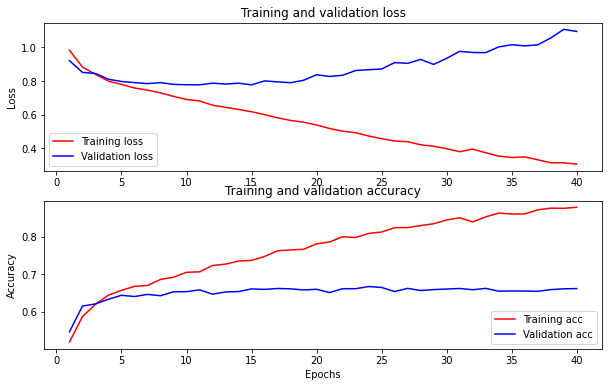

In [ ]:
plot(history)

In [ ]:
probs = mlp_model.predict(np.mean(X_tst_token2vec, axis=1))
y_pred = convert(probs)
probs

array([[9.99896288e-01, 1.02591439e-04, 1.11742270e-06],
       [1.72530133e-02, 1.20043166e-01, 8.62703800e-01],
       [4.04280698e-04, 9.50754106e-01, 4.88416553e-02],
       ...,
       [1.55230679e-04, 9.57754195e-01, 4.20905463e-02],
       [3.56222573e-03, 9.96434331e-01, 3.42425824e-06],
       [2.82137692e-02, 9.44134414e-01, 2.76517235e-02]], dtype=float32)

In [ ]:
y_pred = convert(probs)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_twitter, y_pred, target_names=["0", "1", "2"]))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70      1134
           1       0.66      0.72      0.69      1363
           2       0.60      0.52      0.55       803

    accuracy                           0.66      3300
   macro avg       0.65      0.64      0.65      3300
weighted avg       0.66      0.66      0.66      3300



#### fast text

In [ ]:
mlp_model, history = mlp_fit(X_train=np.mean(X_trn_fastText, axis=1), y_train=y_train_twitter_one_hot, X_val=np.mean(X_tst_fastText, axis=1), y_val=y_test_twitter_one_hot, hidden_units=100, num_labels=3, dropout=0.3, num_hidden_layers=1, num_epochs=40, input_dimension = fastText("hello").shape[0])

Epoch 1/40
210/210 [==============================] - 1s 5ms/step - loss: 0.9878 - categorical_accuracy: 0.5152 - val_loss: 0.9225 - val_categorical_accuracy: 0.5430
Epoch 2/40
210/210 [==============================] - 1s 4ms/step - loss: 0.8804 - categorical_accuracy: 0.5849 - val_loss: 0.8440 - val_categorical_accuracy: 0.6124
Epoch 3/40
210/210 [==============================] - 1s 4ms/step - loss: 0.8198 - categorical_accuracy: 0.6314 - val_loss: 0.8082 - val_categorical_accuracy: 0.6361
Epoch 4/40
210/210 [==============================] - 1s 4ms/step - loss: 0.7964 - categorical_accuracy: 0.6455 - val_loss: 0.7911 - val_categorical_accuracy: 0.6415
Epoch 5/40
210/210 [==============================] - 1s 4ms/step - loss: 0.7648 - categorical_accuracy: 0.6574 - val_loss: 0.7924 - val_categorical_accuracy: 0.6464
Epoch 6/40
210/210 [==============================] - 1s 4ms/step - loss: 0.7412 - categorical_accuracy: 0.6773 - val_loss: 0.7773 - val_categorical_accuracy: 0.6427
Epoc

{'loss': [0.9878026843070984, 0.8804184794425964, 0.819831132888794, 0.7963539361953735, 0.7648240327835083, 0.7412357926368713, 0.7293769717216492, 0.7048730254173279, 0.6914483308792114, 0.6658661961555481, 0.6586116552352905, 0.6353962421417236, 0.6213988065719604, 0.6024571061134338, 0.5818510055541992, 0.5707883834838867, 0.5438129901885986, 0.539992094039917, 0.5159125924110413, 0.4979366660118103, 0.471842885017395, 0.4641510546207428, 0.4381798207759857, 0.4401231110095978, 0.41417911648750305, 0.39403003454208374, 0.38333016633987427, 0.3676682412624359, 0.3555601239204407, 0.34742602705955505, 0.3435957729816437, 0.33064913749694824, 0.3198174834251404, 0.30126434564590454, 0.29432791471481323, 0.28087541460990906, 0.2586512565612793, 0.274955689907074, 0.262702077627182, 0.27141597867012024], 'categorical_accuracy': [0.5151515007019043, 0.5848634243011475, 0.6314375400543213, 0.6454694867134094, 0.6574115753173828, 0.6772652864456177, 0.6862218379974365, 0.6980146169662476, 

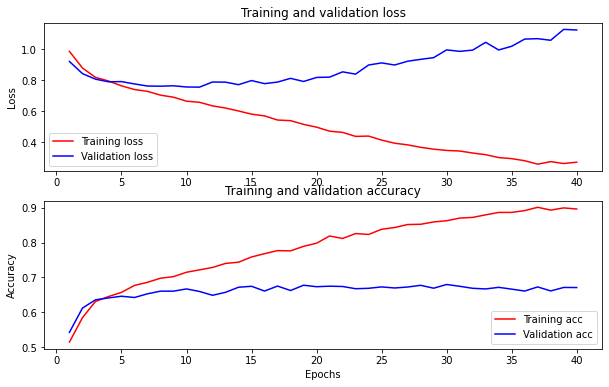

In [ ]:
plot(history)

In [ ]:
probs = mlp_model.predict(np.mean(X_tst_fastText, axis=1))
y_pred = convert(probs)
probs

array([[9.9977309e-01, 2.1827784e-04, 8.7556864e-06],
       [1.0484611e-02, 5.0173587e-01, 4.8777953e-01],
       [2.4153439e-04, 9.0627253e-01, 9.3485922e-02],
       ...,
       [8.1177108e-04, 9.7463042e-01, 2.4557753e-02],
       [3.7555222e-04, 9.9962437e-01, 5.2681082e-10],
       [1.2486912e-01, 5.0536478e-01, 3.6976606e-01]], dtype=float32)

In [ ]:
y_pred = convert(probs)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_twitter, y_pred, target_names=["0", "1", "2"]))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72      1134
           1       0.69      0.70      0.70      1363
           2       0.58      0.52      0.55       803

    accuracy                           0.67      3300
   macro avg       0.66      0.65      0.66      3300
weighted avg       0.67      0.67      0.67      3300



#### word2vec

In [ ]:
mlp_model, history = mlp_fit(X_train=np.mean(X_trn_word2vec, axis=1), y_train=y_train_twitter_one_hot, X_val=np.mean(X_tst_word2vec, axis=1), y_val=y_test_twitter_one_hot, hidden_units=100, num_labels=3, dropout=0.3, num_hidden_layers=1, num_epochs=40, input_dimension = word2vec("hello").shape[0])

Epoch 1/40
210/210 [==============================] - 1s 5ms/step - loss: 1.0050 - categorical_accuracy: 0.5029 - val_loss: 0.9659 - val_categorical_accuracy: 0.5330
Epoch 2/40
210/210 [==============================] - 1s 4ms/step - loss: 0.9586 - categorical_accuracy: 0.5443 - val_loss: 0.9499 - val_categorical_accuracy: 0.5370
Epoch 3/40
210/210 [==============================] - 1s 4ms/step - loss: 0.9389 - categorical_accuracy: 0.5513 - val_loss: 0.9481 - val_categorical_accuracy: 0.5424
Epoch 4/40
210/210 [==============================] - 1s 4ms/step - loss: 0.9345 - categorical_accuracy: 0.5558 - val_loss: 0.9384 - val_categorical_accuracy: 0.5464
Epoch 5/40
210/210 [==============================] - 1s 4ms/step - loss: 0.9272 - categorical_accuracy: 0.5607 - val_loss: 0.9534 - val_categorical_accuracy: 0.5355
Epoch 6/40
210/210 [==============================] - 1s 4ms/step - loss: 0.9228 - categorical_accuracy: 0.5601 - val_loss: 0.9386 - val_categorical_accuracy: 0.5452
Epoc

{'loss': [1.0049594640731812, 0.9585733413696289, 0.9389193654060364, 0.9345272183418274, 0.927200973033905, 0.9228060245513916, 0.917960524559021, 0.9181732535362244, 0.9176615476608276, 0.9138915538787842, 0.9098833799362183, 0.9080298542976379, 0.9110098481178284, 0.9044221639633179, 0.9034461975097656, 0.9040113687515259, 0.8983770608901978, 0.9006535410881042, 0.9010047912597656, 0.8925177454948425, 0.894965648651123, 0.8920561075210571, 0.8920915722846985, 0.8926001191139221, 0.8884885311126709, 0.8895266652107239, 0.8819743394851685, 0.8871592879295349, 0.8856136798858643, 0.8800373077392578, 0.880047619342804, 0.8752397894859314, 0.8761954307556152, 0.876707911491394, 0.8745754957199097, 0.8724801540374756, 0.873708188533783, 0.8691832423210144, 0.8731566667556763, 0.8666085600852966], 'categorical_accuracy': [0.502910852432251, 0.5442603230476379, 0.5512763261795044, 0.5557546019554138, 0.5606806874275208, 0.5600835680961609, 0.5642633438110352, 0.5635169148445129, 0.566950261

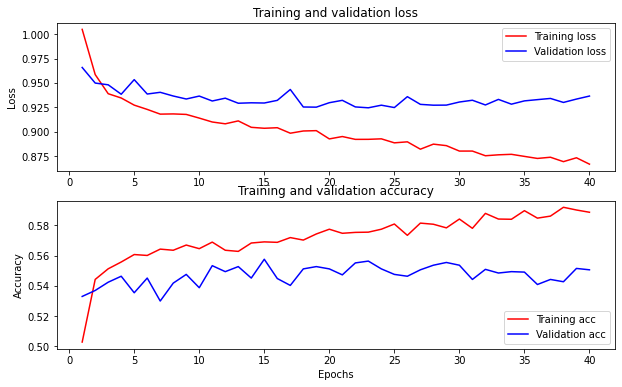

In [ ]:
plot(history)

In [ ]:
probs = mlp_model.predict(np.mean(X_tst_word2vec, axis=1))
y_pred = convert(probs)
probs

array([[0.88242155, 0.05668301, 0.06089551],
       [0.30123246, 0.4167421 , 0.2820254 ],
       [0.10328005, 0.47205755, 0.42466238],
       ...,
       [0.14489366, 0.4563614 , 0.39874494],
       [0.21024774, 0.70530915, 0.08444303],
       [0.14746222, 0.6003702 , 0.25216758]], dtype=float32)

In [ ]:
y_pred = convert(probs)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_twitter, y_pred, target_names=["0", "1", "2"]))

              precision    recall  f1-score   support

           0       0.59      0.72      0.65      1134
           1       0.55      0.67      0.60      1363
           2       0.37      0.11      0.17       803

    accuracy                           0.55      3300
   macro avg       0.50      0.50      0.47      3300
weighted avg       0.52      0.55      0.51      3300



#### GloVe

In [ ]:
mlp_model, history = mlp_fit(X_train=np.mean(X_trn_glove, axis=1), y_train=y_train_twitter_one_hot, X_val=np.mean(X_tst_glove, axis=1), y_val=y_test_twitter_one_hot, hidden_units=100, num_labels=3, dropout=0.3, num_hidden_layers=1, num_epochs=40, input_dimension = glove("hello").shape[0])

Epoch 1/40
210/210 [==============================] - 1s 5ms/step - loss: 0.9973 - categorical_accuracy: 0.5032 - val_loss: 0.9700 - val_categorical_accuracy: 0.5294
Epoch 2/40
210/210 [==============================] - 1s 4ms/step - loss: 0.9389 - categorical_accuracy: 0.5465 - val_loss: 0.9217 - val_categorical_accuracy: 0.5630
Epoch 3/40
210/210 [==============================] - 1s 4ms/step - loss: 0.9083 - categorical_accuracy: 0.5713 - val_loss: 0.9053 - val_categorical_accuracy: 0.5830
Epoch 4/40
210/210 [==============================] - 1s 4ms/step - loss: 0.8837 - categorical_accuracy: 0.5893 - val_loss: 0.8861 - val_categorical_accuracy: 0.6027
Epoch 5/40
210/210 [==============================] - 1s 4ms/step - loss: 0.8716 - categorical_accuracy: 0.5977 - val_loss: 0.8683 - val_categorical_accuracy: 0.6027
Epoch 6/40
210/210 [==============================] - 1s 4ms/step - loss: 0.8606 - categorical_accuracy: 0.6035 - val_loss: 0.8702 - val_categorical_accuracy: 0.6015
Epoc

{'loss': [0.9973240494728088, 0.9389240145683289, 0.9083124399185181, 0.8837360739707947, 0.8716209530830383, 0.8606445789337158, 0.8474414348602295, 0.8378111124038696, 0.8329983949661255, 0.8205354809761047, 0.8146252632141113, 0.8074401617050171, 0.8018752932548523, 0.7950488924980164, 0.7901488542556763, 0.7816575765609741, 0.7772802710533142, 0.7676884531974792, 0.7631112933158875, 0.7620945572853088, 0.7554806470870972, 0.7420783638954163, 0.7347451448440552, 0.7349804639816284, 0.7328434586524963, 0.7263013124465942, 0.7144829034805298, 0.7108796238899231, 0.7136023044586182, 0.7068644165992737, 0.6999911665916443, 0.6864613890647888, 0.6858575344085693, 0.6729082465171814, 0.6767973303794861, 0.6764108538627625, 0.6569910645484924, 0.6606557369232178, 0.6635146737098694, 0.6520938277244568], 'categorical_accuracy': [0.5032094120979309, 0.546499490737915, 0.5712792873382568, 0.5893417000770569, 0.5977011322975159, 0.6035228967666626, 0.6093446612358093, 0.6130765676498413, 0.618

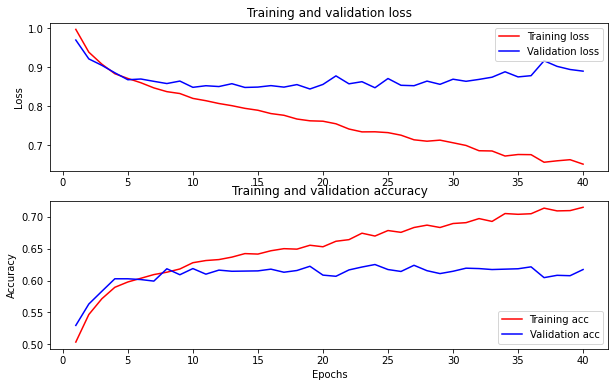

In [ ]:
plot(history)

In [ ]:
probs = mlp_model.predict(np.mean(X_tst_glove, axis=1))
y_pred = convert(probs)
probs

array([[9.95553076e-01, 5.44261246e-04, 3.90263484e-03],
       [5.27713634e-02, 6.47476494e-01, 2.99752206e-01],
       [1.07663861e-02, 6.09929383e-01, 3.79304200e-01],
       ...,
       [4.15221304e-02, 8.57674837e-01, 1.00802995e-01],
       [3.41971889e-02, 9.64539289e-01, 1.26357051e-03],
       [5.19388467e-02, 7.66329706e-01, 1.81731462e-01]], dtype=float32)

In [ ]:
y_pred = convert(probs)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_twitter, y_pred, target_names=["0", "1", "2"]))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66      1134
           1       0.61      0.72      0.66      1363
           2       0.55      0.39      0.46       803

    accuracy                           0.62      3300
   macro avg       0.61      0.59      0.59      3300
weighted avg       0.61      0.62      0.61      3300



### mlp: hidden_units = 100, num_hidden_layers = 3, and num_epochs = 40, input_dimension

#### Token2vec

In [ ]:
mlp_model, history = mlp_fit(X_train=np.mean(X_trn_token2vec, axis=1), y_train=y_train_twitter_one_hot, X_val=np.mean(X_tst_token2vec, axis=1), y_val=y_test_twitter_one_hot, hidden_units=100, num_labels=3, dropout=0.3, num_hidden_layers=3, num_epochs=40, input_dimension = token2vec("hello").shape[0])

Epoch 1/40
210/210 [==============================] - 2s 5ms/step - loss: 1.0011 - categorical_accuracy: 0.5017 - val_loss: 0.9434 - val_categorical_accuracy: 0.5388
Epoch 2/40
210/210 [==============================] - 1s 4ms/step - loss: 0.9069 - categorical_accuracy: 0.5720 - val_loss: 0.8610 - val_categorical_accuracy: 0.6091
Epoch 3/40
210/210 [==============================] - 1s 4ms/step - loss: 0.8457 - categorical_accuracy: 0.6122 - val_loss: 0.8311 - val_categorical_accuracy: 0.6212
Epoch 4/40
210/210 [==============================] - 1s 4ms/step - loss: 0.8189 - categorical_accuracy: 0.6323 - val_loss: 0.8265 - val_categorical_accuracy: 0.6255
Epoch 5/40
210/210 [==============================] - 1s 5ms/step - loss: 0.7942 - categorical_accuracy: 0.6467 - val_loss: 0.7950 - val_categorical_accuracy: 0.6439
Epoch 6/40
210/210 [==============================] - 1s 4ms/step - loss: 0.7761 - categorical_accuracy: 0.6576 - val_loss: 0.7893 - val_categorical_accuracy: 0.6500
Epoc

{'loss': [1.0011347532272339, 0.906893253326416, 0.8456960320472717, 0.8188766837120056, 0.7942430377006531, 0.7761375904083252, 0.7495077252388, 0.7366725206375122, 0.7193369269371033, 0.7036244869232178, 0.6793773770332336, 0.6736685633659363, 0.6529752612113953, 0.6298491358757019, 0.6256874203681946, 0.6073024868965149, 0.5945949554443359, 0.5811790823936462, 0.57345050573349, 0.5563552379608154, 0.5528068542480469, 0.537975013256073, 0.5335493683815002, 0.5115171670913696, 0.5082153677940369, 0.4783836603164673, 0.4789283275604248, 0.47176826000213623, 0.4634558856487274, 0.4489448070526123, 0.4466402530670166, 0.4281986355781555, 0.4285949766635895, 0.4232637882232666, 0.4257620573043823, 0.4230145812034607, 0.3843359053134918, 0.39004191756248474, 0.40066468715667725, 0.388736754655838], 'categorical_accuracy': [0.501716673374176, 0.5720256567001343, 0.6121809482574463, 0.6323331594467163, 0.6466636657714844, 0.6575608253479004, 0.6717420220375061, 0.6796537041664124, 0.68547546

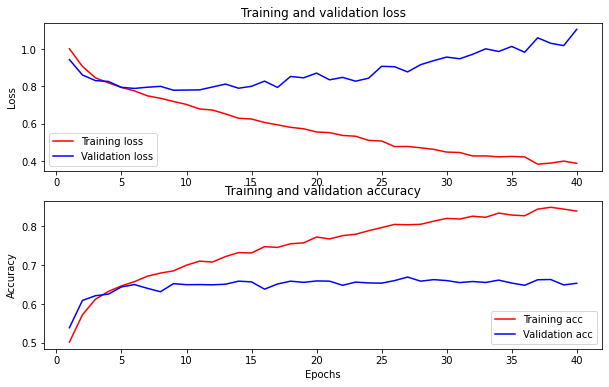

In [ ]:
plot(history)

In [ ]:
probs = mlp_model.predict(np.mean(X_tst_token2vec, axis=1))
y_pred = convert(probs)
probs

array([[9.9999571e-01, 3.2241824e-06, 1.0972093e-06],
       [4.2248482e-01, 1.2975945e-01, 4.4775578e-01],
       [2.7985303e-05, 8.1494904e-01, 1.8502301e-01],
       ...,
       [3.0368387e-03, 9.6338487e-01, 3.3578340e-02],
       [2.8485534e-01, 7.1508843e-01, 5.6293196e-05],
       [6.9944412e-02, 8.9323992e-01, 3.6815666e-02]], dtype=float32)

In [ ]:
y_pred = convert(probs)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_twitter, y_pred, target_names=["0", "1", "2"]))

              precision    recall  f1-score   support

           0       0.65      0.76      0.70      1134
           1       0.66      0.73      0.69      1363
           2       0.64      0.37      0.47       803

    accuracy                           0.65      3300
   macro avg       0.65      0.62      0.62      3300
weighted avg       0.65      0.65      0.64      3300



#### fast text

In [ ]:
mlp_model, history = mlp_fit(X_train=np.mean(X_trn_fastText, axis=1), y_train=y_train_twitter_one_hot, X_val=np.mean(X_tst_fastText, axis=1), y_val=y_test_twitter_one_hot, hidden_units=100, num_labels=3, dropout=0.3, num_hidden_layers=3, num_epochs=40, input_dimension = fastText("hello").shape[0])

Epoch 1/40
210/210 [==============================] - 2s 5ms/step - loss: 0.9976 - categorical_accuracy: 0.5059 - val_loss: 0.9439 - val_categorical_accuracy: 0.5518
Epoch 2/40
210/210 [==============================] - 1s 4ms/step - loss: 0.9141 - categorical_accuracy: 0.5672 - val_loss: 0.8678 - val_categorical_accuracy: 0.5733
Epoch 3/40
210/210 [==============================] - 1s 5ms/step - loss: 0.8546 - categorical_accuracy: 0.6043 - val_loss: 0.8260 - val_categorical_accuracy: 0.6285
Epoch 4/40
210/210 [==============================] - 1s 4ms/step - loss: 0.8135 - categorical_accuracy: 0.6320 - val_loss: 0.8097 - val_categorical_accuracy: 0.6258
Epoch 5/40
210/210 [==============================] - 1s 4ms/step - loss: 0.7832 - categorical_accuracy: 0.6511 - val_loss: 0.7867 - val_categorical_accuracy: 0.6485
Epoch 6/40
210/210 [==============================] - 1s 4ms/step - loss: 0.7642 - categorical_accuracy: 0.6622 - val_loss: 0.7744 - val_categorical_accuracy: 0.6542
Epoc

{'loss': [0.9975608587265015, 0.9141072034835815, 0.8546363711357117, 0.8135271668434143, 0.7832180857658386, 0.7641846537590027, 0.7354066371917725, 0.7214191555976868, 0.7041339874267578, 0.685628354549408, 0.6728745698928833, 0.659529983997345, 0.6380224227905273, 0.6291563510894775, 0.614262044429779, 0.5968050360679626, 0.5819031000137329, 0.5667172074317932, 0.5442131161689758, 0.5388880968093872, 0.5178730487823486, 0.49252834916114807, 0.49207803606987, 0.48026537895202637, 0.47540298104286194, 0.4576833248138428, 0.44774264097213745, 0.43319886922836304, 0.4365130066871643, 0.40881064534187317, 0.4141365885734558, 0.3922138214111328, 0.3875919282436371, 0.3828388750553131, 0.3693653643131256, 0.36262810230255127, 0.35014668107032776, 0.3552860617637634, 0.34901005029678345, 0.32726603746414185], 'categorical_accuracy': [0.5058963894844055, 0.5672488212585449, 0.60426926612854, 0.6320346593856812, 0.6511419415473938, 0.6621884107589722, 0.6792058348655701, 0.6899537444114685, 0

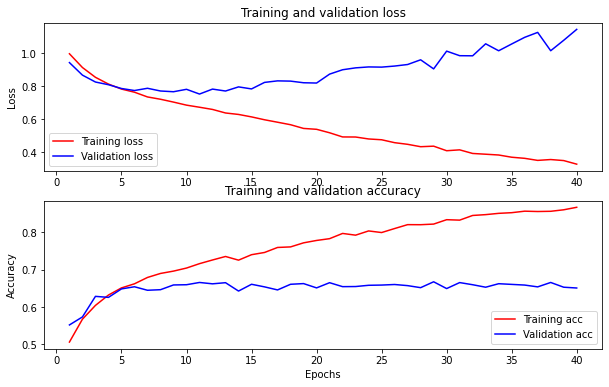

In [ ]:
plot(history)

In [ ]:
probs = mlp_model.predict(np.mean(X_tst_fastText, axis=1))
y_pred = convert(probs)
probs

array([[9.9999976e-01, 2.1936195e-07, 4.8103561e-09],
       [6.5054296e-04, 4.3993568e-01, 5.5941379e-01],
       [9.3408242e-05, 3.9273399e-01, 6.0717261e-01],
       ...,
       [6.7998873e-05, 2.3796508e-01, 7.6196688e-01],
       [5.1564632e-07, 9.9999952e-01, 7.0117718e-13],
       [1.4673163e-02, 1.9660904e-01, 7.8871775e-01]], dtype=float32)

In [ ]:
y_pred = convert(probs)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_twitter, y_pred, target_names=["0", "1", "2"]))

              precision    recall  f1-score   support

           0       0.71      0.70      0.71      1134
           1       0.70      0.64      0.67      1363
           2       0.51      0.60      0.55       803

    accuracy                           0.65      3300
   macro avg       0.64      0.65      0.64      3300
weighted avg       0.66      0.65      0.65      3300



#### word2vec

In [ ]:
mlp_model, history = mlp_fit(X_train=np.mean(X_trn_word2vec, axis=1), y_train=y_train_twitter_one_hot, X_val=np.mean(X_tst_word2vec, axis=1), y_val=y_test_twitter_one_hot, hidden_units=100, num_labels=3, dropout=0.3, num_hidden_layers=3, num_epochs=40, input_dimension = word2vec("hello").shape[0])

Epoch 1/40
210/210 [==============================] - 2s 5ms/step - loss: 1.0134 - categorical_accuracy: 0.5032 - val_loss: 0.9668 - val_categorical_accuracy: 0.5279
Epoch 2/40
210/210 [==============================] - 1s 5ms/step - loss: 0.9657 - categorical_accuracy: 0.5422 - val_loss: 0.9666 - val_categorical_accuracy: 0.5197
Epoch 3/40
210/210 [==============================] - 1s 4ms/step - loss: 0.9582 - categorical_accuracy: 0.5489 - val_loss: 0.9514 - val_categorical_accuracy: 0.5406
Epoch 4/40
210/210 [==============================] - 1s 4ms/step - loss: 0.9464 - categorical_accuracy: 0.5547 - val_loss: 0.9431 - val_categorical_accuracy: 0.5461
Epoch 5/40
210/210 [==============================] - 1s 4ms/step - loss: 0.9397 - categorical_accuracy: 0.5580 - val_loss: 0.9457 - val_categorical_accuracy: 0.5448
Epoch 6/40
210/210 [==============================] - 1s 4ms/step - loss: 0.9320 - categorical_accuracy: 0.5596 - val_loss: 0.9408 - val_categorical_accuracy: 0.5488
Epoc

{'loss': [1.0133919715881348, 0.9657220840454102, 0.9581798315048218, 0.9464104175567627, 0.9397196769714355, 0.9319522380828857, 0.9301137328147888, 0.9273664355278015, 0.9279413819313049, 0.9248844385147095, 0.9239523410797119, 0.9200043082237244, 0.9187572598457336, 0.9141994118690491, 0.9176633954048157, 0.9134730696678162, 0.9123504757881165, 0.9075441360473633, 0.9125156402587891, 0.9083490371704102, 0.9077024459838867, 0.9059309959411621, 0.903159499168396, 0.9013311266899109, 0.9038099646568298, 0.9001321792602539, 0.8970122337341309, 0.89990234375, 0.8934844136238098, 0.8922894597053528, 0.8984289169311523, 0.8927678465843201, 0.8895236253738403, 0.8895906209945679, 0.8891252279281616, 0.8846895098686218, 0.8872959613800049, 0.8792780637741089, 0.8862445950508118, 0.8824775815010071], 'categorical_accuracy': [0.5032094120979309, 0.5421704649925232, 0.5488879084587097, 0.5547096729278564, 0.5579937100410461, 0.5596357583999634, 0.5609792470932007, 0.5648604035377502, 0.55993431

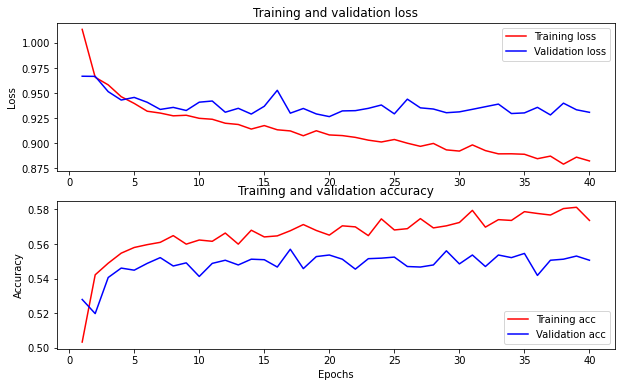

In [ ]:
plot(history)

In [ ]:
probs = mlp_model.predict(np.mean(X_tst_word2vec, axis=1))
y_pred = convert(probs)
probs

array([[0.7935303 , 0.12219726, 0.08427239],
       [0.27465394, 0.4013205 , 0.3240256 ],
       [0.08508261, 0.4787784 , 0.43613905],
       ...,
       [0.10435126, 0.45502502, 0.44062382],
       [0.16667464, 0.74467987, 0.08864549],
       [0.15903416, 0.4971594 , 0.34380636]], dtype=float32)

In [ ]:
y_pred = convert(probs)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_twitter, y_pred, target_names=["0", "1", "2"]))

              precision    recall  f1-score   support

           0       0.61      0.68      0.64      1134
           1       0.54      0.70      0.61      1363
           2       0.37      0.12      0.18       803

    accuracy                           0.55      3300
   macro avg       0.50      0.50      0.48      3300
weighted avg       0.52      0.55      0.51      3300



#### GloVe

In [ ]:
mlp_model, history = mlp_fit(X_train=np.mean(X_trn_glove, axis=1), y_train=y_train_twitter_one_hot, X_val=np.mean(X_tst_glove, axis=1), y_val=y_test_twitter_one_hot, hidden_units=100, num_labels=3, dropout=0.3, num_hidden_layers=3, num_epochs=40, input_dimension = glove("hello").shape[0])

Epoch 1/40
210/210 [==============================] - 2s 5ms/step - loss: 1.0074 - categorical_accuracy: 0.5022 - val_loss: 0.9572 - val_categorical_accuracy: 0.5309
Epoch 2/40
210/210 [==============================] - 1s 5ms/step - loss: 0.9460 - categorical_accuracy: 0.5465 - val_loss: 0.9375 - val_categorical_accuracy: 0.5618
Epoch 3/40
210/210 [==============================] - 1s 4ms/step - loss: 0.9227 - categorical_accuracy: 0.5625 - val_loss: 0.9042 - val_categorical_accuracy: 0.5630
Epoch 4/40
210/210 [==============================] - 1s 4ms/step - loss: 0.8944 - categorical_accuracy: 0.5789 - val_loss: 0.8886 - val_categorical_accuracy: 0.5906
Epoch 5/40
210/210 [==============================] - 1s 4ms/step - loss: 0.8807 - categorical_accuracy: 0.5841 - val_loss: 0.8807 - val_categorical_accuracy: 0.6024
Epoch 6/40
210/210 [==============================] - 1s 4ms/step - loss: 0.8682 - categorical_accuracy: 0.5996 - val_loss: 0.8843 - val_categorical_accuracy: 0.5979
Epoc

{'loss': [1.0073935985565186, 0.9459696412086487, 0.9227067232131958, 0.8943805694580078, 0.8807376027107239, 0.8682474493980408, 0.8614415526390076, 0.8509712219238281, 0.8369969129562378, 0.8346173167228699, 0.836867094039917, 0.8199285268783569, 0.8181837201118469, 0.8058075904846191, 0.8001348972320557, 0.7915509343147278, 0.7908859848976135, 0.7809937000274658, 0.7817049026489258, 0.7749224901199341, 0.769909679889679, 0.7615019679069519, 0.7656059861183167, 0.7594952583312988, 0.7465964555740356, 0.7396324872970581, 0.7331867814064026, 0.7265452742576599, 0.7281633019447327, 0.7228230834007263, 0.7208911776542664, 0.7137287855148315, 0.7151813507080078, 0.7086599469184875, 0.7048470973968506, 0.6880886554718018, 0.690074622631073, 0.6891490817070007, 0.6902181506156921, 0.6796358227729797], 'categorical_accuracy': [0.5021644830703735, 0.546499490737915, 0.5624719858169556, 0.5788923501968384, 0.58411705493927, 0.599641740322113, 0.5969547629356384, 0.6109867095947266, 0.613375127

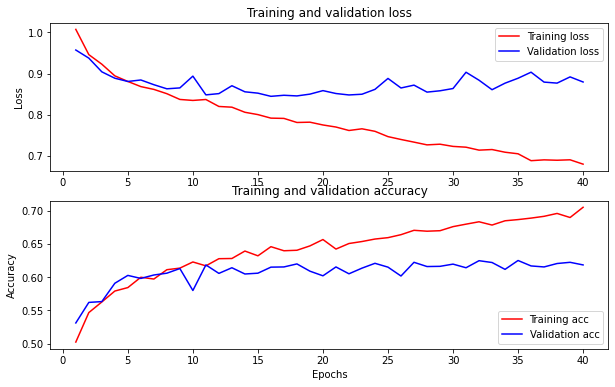

In [ ]:
plot(history)

In [ ]:
probs = mlp_model.predict(np.mean(X_tst_glove, axis=1))
y_pred = convert(probs)
probs

array([[9.9973863e-01, 9.3582727e-05, 1.6780288e-04],
       [7.5273454e-02, 5.8421022e-01, 3.4051633e-01],
       [2.3831178e-02, 7.5947678e-01, 2.1669208e-01],
       ...,
       [3.4011286e-02, 7.1500456e-01, 2.5098416e-01],
       [9.6467994e-03, 9.8989993e-01, 4.5326818e-04],
       [9.7247086e-02, 5.5025977e-01, 3.5249314e-01]], dtype=float32)

In [ ]:
y_pred = convert(probs)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_twitter, y_pred, target_names=["0", "1", "2"]))

              precision    recall  f1-score   support

           0       0.70      0.61      0.65      1134
           1       0.61      0.72      0.66      1363
           2       0.51      0.45      0.48       803

    accuracy                           0.62      3300
   macro avg       0.61      0.59      0.60      3300
weighted avg       0.62      0.62      0.62      3300



### mlp: hidden_units = 100, num_hidden_layers = 5, and num_epochs = 40, input_dimension

#### Token2vec

In [ ]:
mlp_model, history = mlp_fit(X_train=np.mean(X_trn_token2vec, axis=1), y_train=y_train_twitter_one_hot, X_val=np.mean(X_tst_token2vec, axis=1), y_val=y_test_twitter_one_hot, hidden_units=100, num_labels=3, dropout=0.3, num_hidden_layers=5, num_epochs=40, input_dimension = token2vec("hello").shape[0])

Epoch 1/40
210/210 [==============================] - 2s 6ms/step - loss: 1.0104 - categorical_accuracy: 0.5023 - val_loss: 0.9562 - val_categorical_accuracy: 0.5373
Epoch 2/40
210/210 [==============================] - 1s 5ms/step - loss: 0.9477 - categorical_accuracy: 0.5544 - val_loss: 0.9140 - val_categorical_accuracy: 0.5697
Epoch 3/40
210/210 [==============================] - 1s 4ms/step - loss: 0.9069 - categorical_accuracy: 0.5680 - val_loss: 0.8708 - val_categorical_accuracy: 0.5891
Epoch 4/40
210/210 [==============================] - 1s 4ms/step - loss: 0.8686 - categorical_accuracy: 0.5886 - val_loss: 0.8558 - val_categorical_accuracy: 0.6170
Epoch 5/40
210/210 [==============================] - 1s 5ms/step - loss: 0.8483 - categorical_accuracy: 0.6017 - val_loss: 0.8637 - val_categorical_accuracy: 0.6136
Epoch 6/40
210/210 [==============================] - 1s 5ms/step - loss: 0.8310 - categorical_accuracy: 0.6220 - val_loss: 0.8150 - val_categorical_accuracy: 0.6364
Epoc

{'loss': [1.0104122161865234, 0.9477009773254395, 0.9068926572799683, 0.8686395287513733, 0.8483211398124695, 0.8310229182243347, 0.8043222427368164, 0.7817051410675049, 0.7787278890609741, 0.7616345882415771, 0.757330060005188, 0.7333081364631653, 0.721419632434845, 0.719579815864563, 0.6929289102554321, 0.6930518746376038, 0.6969432830810547, 0.6644893288612366, 0.67295241355896, 0.6543503999710083, 0.6298537254333496, 0.6299858093261719, 0.618337094783783, 0.6107063889503479, 0.5984727740287781, 0.6003341674804688, 0.5812046527862549, 0.585407018661499, 0.5659505724906921, 0.5511788725852966, 0.5506014823913574, 0.5584139227867126, 0.5473275184631348, 0.5257443189620972, 0.5166780352592468, 0.51589435338974, 0.5155221223831177, 0.5004880428314209, 0.5043540596961975, 0.4797559976577759], 'categorical_accuracy': [0.5023137927055359, 0.5544111132621765, 0.5679952502250671, 0.5885953307151794, 0.6017315983772278, 0.6220331192016602, 0.6326317191123962, 0.6459172964096069, 0.64785790443

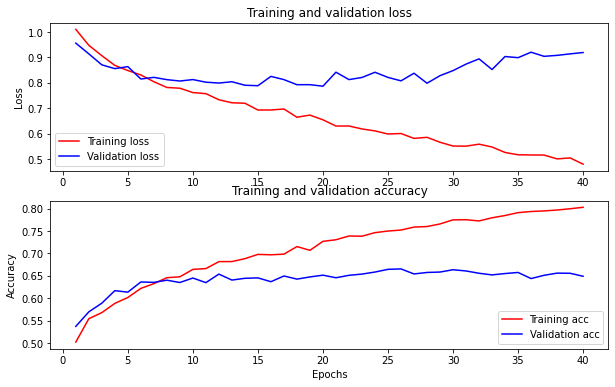

In [ ]:
plot(history)

In [ ]:
probs = mlp_model.predict(np.mean(X_tst_token2vec, axis=1))
y_pred = convert(probs)
probs

array([[9.9903226e-01, 9.0631185e-04, 6.1432824e-05],
       [2.7216708e-02, 6.4754702e-02, 9.0802860e-01],
       [2.4222350e-03, 7.1105236e-01, 2.8652546e-01],
       ...,
       [2.5568310e-02, 6.2946826e-01, 3.4496343e-01],
       [3.9088428e-01, 5.9879279e-01, 1.0322897e-02],
       [2.3068035e-01, 6.2724006e-01, 1.4207959e-01]], dtype=float32)

In [ ]:
y_pred = convert(probs)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_twitter, y_pred, target_names=["0", "1", "2"]))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68      1134
           1       0.65      0.72      0.68      1363
           2       0.57      0.52      0.55       803

    accuracy                           0.65      3300
   macro avg       0.64      0.63      0.64      3300
weighted avg       0.65      0.65      0.65      3300



#### fast text

In [ ]:
mlp_model, history = mlp_fit(X_train=np.mean(X_trn_fastText, axis=1), y_train=y_train_twitter_one_hot, X_val=np.mean(X_tst_fastText, axis=1), y_val=y_test_twitter_one_hot, hidden_units=100, num_labels=3, dropout=0.3, num_hidden_layers=5, num_epochs=40, input_dimension = fastText("hello").shape[0])

Epoch 1/40
210/210 [==============================] - 2s 5ms/step - loss: 1.0271 - categorical_accuracy: 0.4668 - val_loss: 0.9493 - val_categorical_accuracy: 0.5336
Epoch 2/40
210/210 [==============================] - 1s 5ms/step - loss: 0.9374 - categorical_accuracy: 0.5565 - val_loss: 0.9253 - val_categorical_accuracy: 0.5542
Epoch 3/40
210/210 [==============================] - 1s 4ms/step - loss: 0.8987 - categorical_accuracy: 0.5765 - val_loss: 0.8890 - val_categorical_accuracy: 0.5852
Epoch 4/40
210/210 [==============================] - 1s 4ms/step - loss: 0.8781 - categorical_accuracy: 0.5920 - val_loss: 0.8674 - val_categorical_accuracy: 0.5961
Epoch 5/40
210/210 [==============================] - 1s 4ms/step - loss: 0.8559 - categorical_accuracy: 0.5992 - val_loss: 0.8574 - val_categorical_accuracy: 0.6085
Epoch 6/40
210/210 [==============================] - 1s 4ms/step - loss: 0.8182 - categorical_accuracy: 0.6298 - val_loss: 0.8129 - val_categorical_accuracy: 0.6318
Epoc

{'loss': [1.0271178483963013, 0.9373595714569092, 0.8986526131629944, 0.878057599067688, 0.8559095859527588, 0.8181984424591064, 0.802545428276062, 0.7788273096084595, 0.7563058733940125, 0.743963897228241, 0.7426201701164246, 0.7154554128646851, 0.6965343952178955, 0.6876199245452881, 0.6713589429855347, 0.6581181287765503, 0.6506356000900269, 0.6377694606781006, 0.6229853630065918, 0.6097055673599243, 0.6013516783714294, 0.5891972780227661, 0.574131429195404, 0.566990315914154, 0.563878059387207, 0.5477771162986755, 0.5349893569946289, 0.5307718515396118, 0.5133190155029297, 0.523654043674469, 0.49029141664505005, 0.4802572727203369, 0.483397513628006, 0.48332732915878296, 0.45932939648628235, 0.4669499397277832, 0.4606547951698303, 0.4474494755268097, 0.43501701951026917, 0.4288474917411804], 'categorical_accuracy': [0.46678608655929565, 0.5565009713172913, 0.5765039324760437, 0.5920286774635315, 0.5991939306259155, 0.629795491695404, 0.6330795884132385, 0.663979709148407, 0.6732348

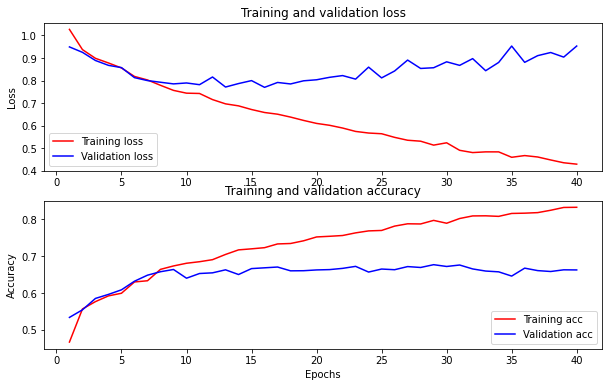

In [ ]:
plot(history)

In [ ]:
probs = mlp_model.predict(np.mean(X_tst_fastText, axis=1))
y_pred = convert(probs)
probs

array([[9.9999368e-01, 6.2017307e-06, 1.6532805e-07],
       [1.8868145e-02, 8.2615620e-01, 1.5497573e-01],
       [2.4437218e-04, 7.6408416e-01, 2.3567146e-01],
       ...,
       [6.7914785e-03, 8.3515429e-01, 1.5805426e-01],
       [4.4373606e-05, 9.9994421e-01, 1.1476070e-05],
       [1.2757617e-01, 1.3357709e-01, 7.3884672e-01]], dtype=float32)

In [ ]:
y_pred = convert(probs)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_twitter, y_pred, target_names=["0", "1", "2"]))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71      1134
           1       0.68      0.69      0.68      1363
           2       0.60      0.51      0.55       803

    accuracy                           0.66      3300
   macro avg       0.65      0.65      0.65      3300
weighted avg       0.66      0.66      0.66      3300



#### word2vec

In [ ]:
mlp_model, history = mlp_fit(X_train=np.mean(X_trn_word2vec, axis=1), y_train=y_train_twitter_one_hot, X_val=np.mean(X_tst_word2vec, axis=1), y_val=y_test_twitter_one_hot, hidden_units=100, num_labels=3, dropout=0.3, num_hidden_layers=5, num_epochs=40, input_dimension = word2vec("hello").shape[0])

Epoch 1/40
210/210 [==============================] - 2s 5ms/step - loss: 1.0191 - categorical_accuracy: 0.4892 - val_loss: 0.9692 - val_categorical_accuracy: 0.5309
Epoch 2/40
210/210 [==============================] - 1s 5ms/step - loss: 0.9762 - categorical_accuracy: 0.5386 - val_loss: 0.9624 - val_categorical_accuracy: 0.5370
Epoch 3/40
210/210 [==============================] - 1s 4ms/step - loss: 0.9690 - categorical_accuracy: 0.5440 - val_loss: 0.9797 - val_categorical_accuracy: 0.5455
Epoch 4/40
210/210 [==============================] - 1s 4ms/step - loss: 0.9633 - categorical_accuracy: 0.5437 - val_loss: 0.9526 - val_categorical_accuracy: 0.5424
Epoch 5/40
210/210 [==============================] - 1s 5ms/step - loss: 0.9555 - categorical_accuracy: 0.5526 - val_loss: 0.9479 - val_categorical_accuracy: 0.5388
Epoch 6/40
210/210 [==============================] - 1s 4ms/step - loss: 0.9500 - categorical_accuracy: 0.5562 - val_loss: 0.9562 - val_categorical_accuracy: 0.5458
Epoc

{'loss': [1.019059419631958, 0.9762062430381775, 0.9690276980400085, 0.963269054889679, 0.9554628133773804, 0.9500348567962646, 0.9495639801025391, 0.9440962076187134, 0.939869225025177, 0.9392530918121338, 0.9376024603843689, 0.9368974566459656, 0.9323533177375793, 0.9331313967704773, 0.9273324012756348, 0.9268618822097778, 0.9270023107528687, 0.9288833737373352, 0.9239273071289062, 0.9217392802238464, 0.9225919246673584, 0.9177967309951782, 0.9179988503456116, 0.9211151599884033, 0.9155319333076477, 0.913837194442749, 0.9184157848358154, 0.9148944616317749, 0.9155995845794678, 0.9119999408721924, 0.9144245386123657, 0.9112391471862793, 0.9142948985099792, 0.9057447910308838, 0.9114826917648315, 0.9107244610786438, 0.9079980850219727, 0.9036420583724976, 0.9022239446640015, 0.9033547043800354], 'categorical_accuracy': [0.48917749524116516, 0.5385878682136536, 0.543961763381958, 0.5436632037162781, 0.5526198148727417, 0.5562024116516113, 0.5545603632926941, 0.5563517212867737, 0.554560

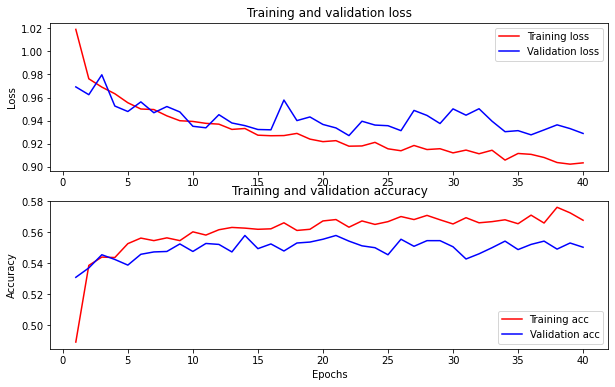

In [ ]:
plot(history)

In [ ]:
probs = mlp_model.predict(np.mean(X_tst_word2vec, axis=1))
y_pred = convert(probs)
probs

array([[0.8324696 , 0.10387649, 0.06365389],
       [0.24417917, 0.4399744 , 0.3158464 ],
       [0.14267285, 0.48737678, 0.36995038],
       ...,
       [0.07066721, 0.593724  , 0.3356088 ],
       [0.1859302 , 0.6059977 , 0.20807205],
       [0.1118221 , 0.58529586, 0.30288202]], dtype=float32)

In [ ]:
y_pred = convert(probs)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_twitter, y_pred, target_names=["0", "1", "2"]))

              precision    recall  f1-score   support

           0       0.62      0.64      0.63      1134
           1       0.51      0.80      0.62      1363
           2       0.00      0.00      0.00       803

    accuracy                           0.55      3300
   macro avg       0.38      0.48      0.42      3300
weighted avg       0.42      0.55      0.47      3300



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### GloVe

In [ ]:
mlp_model, history = mlp_fit(X_train=np.mean(X_trn_glove, axis=1), y_train=y_train_twitter_one_hot, X_val=np.mean(X_tst_glove, axis=1), y_val=y_test_twitter_one_hot, hidden_units=100, num_labels=3, dropout=0.3, num_hidden_layers=5, num_epochs=40, input_dimension = glove("hello").shape[0])

Epoch 1/40
210/210 [==============================] - 2s 5ms/step - loss: 1.0245 - categorical_accuracy: 0.4948 - val_loss: 0.9791 - val_categorical_accuracy: 0.5324
Epoch 2/40
210/210 [==============================] - 1s 4ms/step - loss: 0.9667 - categorical_accuracy: 0.5387 - val_loss: 0.9544 - val_categorical_accuracy: 0.5412
Epoch 3/40
210/210 [==============================] - 1s 4ms/step - loss: 0.9445 - categorical_accuracy: 0.5581 - val_loss: 0.9615 - val_categorical_accuracy: 0.5591
Epoch 4/40
210/210 [==============================] - 1s 4ms/step - loss: 0.9355 - categorical_accuracy: 0.5586 - val_loss: 0.9383 - val_categorical_accuracy: 0.5609
Epoch 5/40
210/210 [==============================] - 1s 5ms/step - loss: 0.9254 - categorical_accuracy: 0.5650 - val_loss: 0.9377 - val_categorical_accuracy: 0.5624
Epoch 6/40
210/210 [==============================] - 1s 4ms/step - loss: 0.9236 - categorical_accuracy: 0.5644 - val_loss: 0.9276 - val_categorical_accuracy: 0.5661
Epoc

{'loss': [1.0244600772857666, 0.9666703939437866, 0.9445029497146606, 0.9354645609855652, 0.9253515601158142, 0.9235744476318359, 0.9103785753250122, 0.9126080870628357, 0.8985386490821838, 0.9004122614860535, 0.8873504996299744, 0.8888667225837708, 0.8774535059928894, 0.8687395453453064, 0.8544896841049194, 0.84989333152771, 0.8448108434677124, 0.8303483724594116, 0.8345944285392761, 0.8276569843292236, 0.8224020004272461, 0.8153426647186279, 0.8109331130981445, 0.8133646845817566, 0.806414008140564, 0.7985838055610657, 0.7917342782020569, 0.7885674834251404, 0.7828701734542847, 0.7857417464256287, 0.7740347385406494, 0.771543025970459, 0.771567165851593, 0.775769054889679, 0.7632552981376648, 0.7564077377319336, 0.7553045749664307, 0.7565497159957886, 0.7559443116188049, 0.7575928568840027], 'categorical_accuracy': [0.4948499798774719, 0.5387371182441711, 0.5581430196762085, 0.558590829372406, 0.5650097131729126, 0.5644125938415527, 0.5715778470039368, 0.56605464220047, 0.57605612277

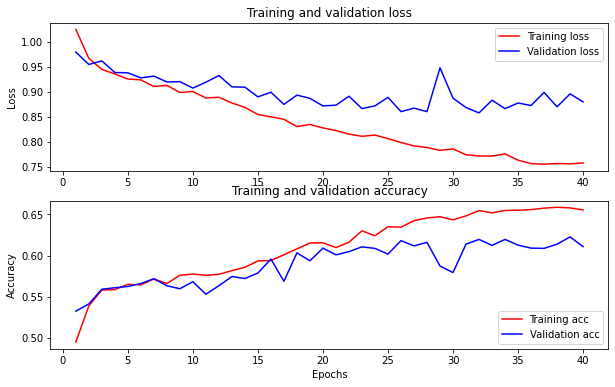

In [ ]:
plot(history)

In [ ]:
probs = mlp_model.predict(np.mean(X_tst_glove, axis=1))
y_pred = convert(probs)
probs

array([[0.9858985 , 0.01278137, 0.00132016],
       [0.07073902, 0.67231745, 0.25694352],
       [0.03698155, 0.7121884 , 0.25083008],
       ...,
       [0.08670495, 0.7399824 , 0.1733126 ],
       [0.0571758 , 0.89381933, 0.04900489],
       [0.15948337, 0.6578394 , 0.18267721]], dtype=float32)

In [ ]:
y_pred = convert(probs)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_twitter, y_pred, target_names=["0", "1", "2"]))

              precision    recall  f1-score   support

           0       0.66      0.65      0.66      1134
           1       0.59      0.76      0.66      1363
           2       0.57      0.30      0.40       803

    accuracy                           0.61      3300
   macro avg       0.61      0.57      0.57      3300
weighted avg       0.61      0.61      0.60      3300



### XGBoost

In [ ]:
from xgboost import XGBClassifier

#### Preprations for XGBoost Classifier

[source](https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/)

In [ ]:
!sudo pip install xgboost

In [ ]:
!sudo pip install --upgrade xgboost

     |████████████████████████████████| 193.7 MB 25 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
! git clone --recursive https://github.com/dmlc/xgboost
! cd xgboost
! cp make/minimum.mk ./config.mk
! make -j4
! cd python-package
! sudo python setup.py install

fatal: destination path 'xgboost' already exists and is not an empty directory.
cp: cannot stat 'make/minimum.mk': No such file or directory
make: *** No targets specified and no makefile found.  Stop.
/bin/bash: line 0: cd: python-package: No such file or directory
python3: can't open file 'setup.py': [Errno 2] No such file or directory


#### XGBoost model

In [ ]:
xgb = XGBClassifier(n_estimators=2000)

##### Token2Vec - SpaCy

In [ ]:
xgb.fit(np.mean(X_trn_token2vec, axis=1), y_train_twitter)

XGBClassifier(n_estimators=2000, objective='multi:softprob')

In [ ]:
y_pred = xgb.predict(np.mean(X_tst_token2vec, axis=1))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_twitter, y_pred, labels=[0, 1, 2])
cm

array([[790, 258,  86],
       [209, 979, 175],
       [158, 297, 348]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_twitter, y_pred, target_names=["0", "1", "2"]))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69      1134
           1       0.64      0.72      0.68      1363
           2       0.57      0.43      0.49       803

    accuracy                           0.64      3300
   macro avg       0.63      0.62      0.62      3300
weighted avg       0.64      0.64      0.64      3300



##### fast text

In [ ]:
xgb.fit(np.mean(X_trn_fastText, axis=1), y_train_twitter)

XGBClassifier(n_estimators=2000, objective='multi:softprob')

In [ ]:
y_pred = xgb.predict(np.mean(X_tst_fastText, axis=1))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_twitter, y_pred, labels=[0, 1, 2])
cm

array([[ 830,  223,   81],
       [ 195, 1015,  153],
       [ 144,  318,  341]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_twitter, y_pred, target_names=["0", "1", "2"]))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1134
           1       0.65      0.74      0.70      1363
           2       0.59      0.42      0.49       803

    accuracy                           0.66      3300
   macro avg       0.65      0.63      0.64      3300
weighted avg       0.66      0.66      0.66      3300



##### word2vec

In [ ]:
xgb.fit(np.mean(X_trn_word2vec, axis=1), y_train_twitter)

XGBClassifier(n_estimators=2000, objective='multi:softprob')

In [ ]:
y_pred = xgb.predict(np.mean(X_tst_word2vec, axis=1))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_twitter, y_pred, labels=[0, 1, 2])
cm

array([[748, 279, 107],
       [288, 852, 223],
       [193, 423, 187]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_twitter, y_pred, target_names=["0", "1", "2"]))

              precision    recall  f1-score   support

           0       0.61      0.66      0.63      1134
           1       0.55      0.63      0.58      1363
           2       0.36      0.23      0.28       803

    accuracy                           0.54      3300
   macro avg       0.51      0.51      0.50      3300
weighted avg       0.52      0.54      0.53      3300



##### GloVe

In [ ]:
xgb.fit(np.mean(X_trn_glove, axis=1), y_train_twitter)

XGBClassifier(n_estimators=2000, objective='multi:softprob')

In [ ]:
y_pred = xgb.predict(np.mean(X_tst_glove, axis=1))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_twitter, y_pred, labels=[0, 1, 2])
cm

array([[743, 299,  92],
       [240, 931, 192],
       [159, 353, 291]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_twitter, y_pred, target_names=["0", "1", "2"]))

              precision    recall  f1-score   support

           0       0.65      0.66      0.65      1134
           1       0.59      0.68      0.63      1363
           2       0.51      0.36      0.42       803

    accuracy                           0.60      3300
   macro avg       0.58      0.57      0.57      3300
weighted avg       0.59      0.60      0.59      3300



# Part Two - Bert

#### Reference to the primary code:
##### Copyright 2020 The TensorFlow Hub Authors.


In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/text/tutorials/classify_text_with_bert"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/text/blob/master/docs/tutorials/classify_text_with_bert.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/text/blob/master/docs/tutorials/classify_text_with_bert.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/text/docs/tutorials/classify_text_with_bert.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
  <td>
    <a href="https://tfhub.dev/google/collections/bert/1"><img src="https://www.tensorflow.org/images/hub_logo_32px.png" />See TF Hub model</a>
  </td>
</table>

### Setup


In [ ]:
# A dependency of the preprocessing for BERT inputs
!pip install -q -U "tensorflow-text==2.8.*"

In [ ]:
!pip install -q tf-models-official==2.7.0

In [ ]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

### Loading models from TensorFlow Hub

Here you can choose which BERT model you will load from TensorFlow Hub and fine-tune. There are multiple BERT models available.

  - [BERT-Base](https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3), [Uncased](https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3) and [seven more models](https://tfhub.dev/google/collections/bert/1) with trained weights released by the original BERT authors.
  - [Small BERTs](https://tfhub.dev/google/collections/bert/1) have the same general architecture but fewer and/or smaller Transformer blocks, which lets you explore tradeoffs between speed, size and quality.
  - [ALBERT](https://tfhub.dev/google/collections/albert/1): four different sizes of "A Lite BERT" that reduces model size (but not computation time) by sharing parameters between layers.
  - [BERT Experts](https://tfhub.dev/google/collections/experts/bert/1): eight models that all have the BERT-base architecture but offer a choice between different pre-training domains, to align more closely with the target task.
  - [Electra](https://tfhub.dev/google/collections/electra/1) has the same architecture as BERT (in three different sizes), but gets pre-trained as a discriminator in a set-up that resembles a Generative Adversarial Network (GAN).
  - BERT with Talking-Heads Attention and Gated GELU [[base](https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1), [large](https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_large/1)] has two improvements to the core of the Transformer architecture.

The model documentation on TensorFlow Hub has more details and references to the
research literature. Follow the links above, or click on the [`tfhub.dev`](http://tfhub.dev) URL
printed after the next cell execution.

The suggestion is to start with a Small BERT (with fewer parameters) since they are faster to fine-tune. If you like a small model but with higher accuracy, ALBERT might be your next option. If you want even better accuracy, choose
one of the classic BERT sizes or their recent refinements like Electra, Talking Heads, or a BERT Expert.

Aside from the models available below, there are [multiple versions](https://tfhub.dev/google/collections/transformer_encoders_text/1) of the models that are larger and can yield even better accuracy, but they are too big to be fine-tuned on a single GPU. You will be able to do that on the [Solve GLUE tasks using BERT on a TPU colab](https://www.tensorflow.org/text/tutorials/bert_glue).

You'll see in the code below that switching the tfhub.dev URL is enough to try any of these models, because all the differences between them are encapsulated in the SavedModels from TF Hub.

In [ ]:
#@title Choose a BERT model to fine-tune

bert_model_name = 'small_bert/bert_en_uncased_L-2_H-128_A-2'  #@param ["bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

### changing data's format

In [ ]:
y_train_twitter_one_hot = tf.keras.utils.to_categorical(y_train_twitter, dtype = int)
y_test_twitter_one_hot = tf.keras.utils.to_categorical(y_test_twitter, dtype = int)

### Using the BERT model - small bert


#### Variables

In [ ]:
epochs = 40
steps_per_epoch = X_train_twitter.shape[0]
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5

#### Defining model1: simple_classifier

In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

metrics = tf.metrics.CategoricalAccuracy()

optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
def simple_classifier():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(3, activation='softmax', name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
model1 = simple_classifier()

model1.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

print(f'Training model with {tfhub_handle_encoder}')
history = model1.fit(x=X_train_twitter,
                    y=y_train_twitter_one_hot,
                    validation_data= (X_test_twitter, y_test_twitter_one_hot),
                    epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1
Epoch 1/40


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


210/210 [==============================] - 25s 103ms/step - loss: 1.1704 - categorical_accuracy: 0.3568 - val_loss: 1.0624 - val_categorical_accuracy: 0.4276
Epoch 2/40
210/210 [==============================] - 21s 100ms/step - loss: 1.1589 - categorical_accuracy: 0.3696 - val_loss: 1.0543 - val_categorical_accuracy: 0.4430
Epoch 3/40
210/210 [==============================] - 21s 100ms/step - loss: 1.1395 - categorical_accuracy: 0.3883 - val_loss: 1.0454 - val_categorical_accuracy: 0.4591
Epoch 4/40
210/210 [==============================] - 21s 100ms/step - loss: 1.1208 - categorical_accuracy: 0.4059 - val_loss: 1.0344 - val_categorical_accuracy: 0.4764
Epoch 5/40
210/210 [==============================] - 21s 99ms/step - loss: 1.1095 - categorical_accuracy: 0.4141 - val_loss: 1.0241 - val_categorical_accuracy: 0.4876
Epoch 6/40
210/210 [==============================] - 21s 100ms/step - loss: 1.0900 - categorical_accuracy: 0.4369 - val_loss: 1.0144 - val_categorical_accuracy: 0.493

In [ ]:
loss, accuracy = model1.evaluate(X_test_twitter, y_test_twitter_one_hot)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

104/104 [==============================] - 7s 63ms/step - loss: 0.5504 - categorical_accuracy: 0.7930
Loss: 0.5503759980201721
Accuracy: 0.793030321598053


{'loss': [1.1703633069992065, 1.1589276790618896, 1.1394526958465576, 1.1208223104476929, 1.1095069646835327, 1.0900399684906006, 1.0866878032684326, 1.0721101760864258, 1.0629116296768188, 1.0412448644638062, 1.031748652458191, 1.0261998176574707, 1.011337161064148, 1.0042768716812134, 0.9984039068222046, 0.9816574454307556, 0.9771522283554077, 0.9647552371025085, 0.9459269642829895, 0.9346086382865906, 0.9140298962593079, 0.8978973031044006, 0.8651394248008728, 0.8460096120834351, 0.8133437037467957, 0.7892297506332397, 0.7529677152633667, 0.7339827418327332, 0.7157775163650513, 0.6862217783927917, 0.6680404543876648, 0.6448209285736084, 0.6190700531005859, 0.6036846041679382, 0.5894457697868347, 0.5633205771446228, 0.5536263585090637, 0.530941903591156, 0.5192149877548218, 0.49283090233802795], 'categorical_accuracy': [0.3567696809768677, 0.36960741877555847, 0.3882668912410736, 0.40588146448135376, 0.41409164667129517, 0.43693089485168457, 0.44245409965515137, 0.45499327778816223, 

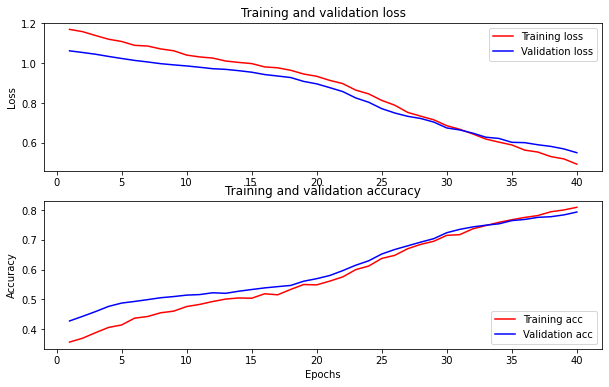

In [ ]:
plot(history)

In [ ]:
probs = model1.predict(X_test_twitter)
y_pred = convert(probs)
probs

array([[0.94361955, 0.04985284, 0.00652756],
       [0.00562857, 0.03345437, 0.96091706],
       [0.00587769, 0.9665313 , 0.02759103],
       ...,
       [0.00254167, 0.96284205, 0.03461625],
       [0.28405786, 0.67827815, 0.03766395],
       [0.01014545, 0.96797925, 0.0218752 ]], dtype=float32)

In [ ]:
y_pred = convert(probs)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_twitter, y_pred, labels=[0, 1, 2])
cm

array([[ 924,  106,  104],
       [  77, 1180,  106],
       [  97,  193,  513]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_twitter, y_pred, target_names=["0", "1", "2"]))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1134
           1       0.80      0.87      0.83      1363
           2       0.71      0.64      0.67       803

    accuracy                           0.79      3300
   macro avg       0.78      0.77      0.78      3300
weighted avg       0.79      0.79      0.79      3300



#### Defining model2: complex_classifier

In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

metrics = tf.metrics.CategoricalAccuracy()

optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
def complex_classifier():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(100, activation='relu', name='extra')(net)
  net = tf.keras.layers.Dense(3, activation='softmax', name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
model1 = complex_classifier()

model1.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

print(f'Training model with {tfhub_handle_encoder}')
history = model1.fit(x=X_train_twitter,
                               y=y_train_twitter_one_hot,
                              validation_data= (X_test_twitter, y_test_twitter_one_hot),
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1
Epoch 1/40


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


210/210 [==============================] - 26s 104ms/step - loss: 1.1674 - categorical_accuracy: 0.4187 - val_loss: 1.1454 - val_categorical_accuracy: 0.4167
Epoch 2/40
210/210 [==============================] - 21s 102ms/step - loss: 1.1458 - categorical_accuracy: 0.4205 - val_loss: 1.1115 - val_categorical_accuracy: 0.4236
Epoch 3/40
210/210 [==============================] - 21s 102ms/step - loss: 1.1235 - categorical_accuracy: 0.4165 - val_loss: 1.0844 - val_categorical_accuracy: 0.4364
Epoch 4/40
210/210 [==============================] - 21s 102ms/step - loss: 1.1055 - categorical_accuracy: 0.4124 - val_loss: 1.0655 - val_categorical_accuracy: 0.4385
Epoch 5/40
210/210 [==============================] - 21s 102ms/step - loss: 1.0894 - categorical_accuracy: 0.4169 - val_loss: 1.0518 - val_categorical_accuracy: 0.4548
Epoch 6/40
210/210 [==============================] - 21s 101ms/step - loss: 1.0754 - categorical_accuracy: 0.4280 - val_loss: 1.0399 - val_categorical_accuracy: 0.46

In [ ]:
loss, accuracy = model1.evaluate(X_test_twitter, y_test_twitter_one_hot)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

104/104 [==============================] - 7s 63ms/step - loss: 0.5623 - categorical_accuracy: 0.7885
Loss: 0.5623152256011963
Accuracy: 0.7884848713874817


{'loss': [1.1674076318740845, 1.1458481550216675, 1.1234817504882812, 1.105469822883606, 1.0893579721450806, 1.075382947921753, 1.0597527027130127, 1.0502543449401855, 1.0352932214736938, 1.0298409461975098, 1.0157883167266846, 1.0061564445495605, 1.003424048423767, 0.987341046333313, 0.9790032505989075, 0.9732025265693665, 0.9624161124229431, 0.9587279558181763, 0.9455728530883789, 0.9311544299125671, 0.9153464436531067, 0.9068124294281006, 0.890627384185791, 0.867186427116394, 0.8419734239578247, 0.8217161893844604, 0.7860904932022095, 0.7630363702774048, 0.7328110337257385, 0.7149353623390198, 0.681781530380249, 0.6591750979423523, 0.6292032599449158, 0.6198353171348572, 0.5997416973114014, 0.5728752017021179, 0.5542706251144409, 0.5348725914955139, 0.5128275156021118, 0.4974035322666168], 'categorical_accuracy': [0.41871920228004456, 0.42051053047180176, 0.41648006439208984, 0.4124496281147003, 0.41692790389060974, 0.42797431349754333, 0.448723703622818, 0.4467830955982208, 0.46185

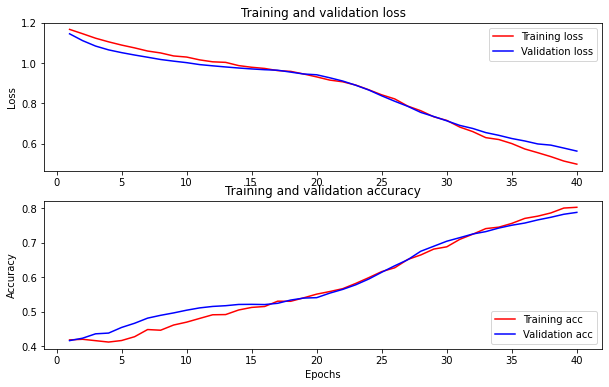

In [ ]:
plot(history)

In [ ]:
probs = model1.predict(X_test_twitter)
y_pred = convert(probs)
probs

array([[0.9611291 , 0.02661702, 0.01225383],
       [0.02575018, 0.0449905 , 0.92925936],
       [0.00493553, 0.96547556, 0.0295889 ],
       ...,
       [0.00375491, 0.9220047 , 0.07424037],
       [0.11904118, 0.83153003, 0.04942887],
       [0.01808047, 0.96834636, 0.01357318]], dtype=float32)

In [ ]:
y_pred = convert(probs)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_twitter, y_pred, labels=[0, 1, 2])
cm

array([[ 925,   99,  110],
       [  86, 1153,  124],
       [ 110,  169,  524]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_twitter, y_pred, target_names=["0", "1", "2"]))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1134
           1       0.81      0.85      0.83      1363
           2       0.69      0.65      0.67       803

    accuracy                           0.79      3300
   macro avg       0.78      0.77      0.77      3300
weighted avg       0.79      0.79      0.79      3300



#### Defining model3: morecomplex_classifier

In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

metrics = tf.metrics.CategoricalAccuracy()

optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
def mcomplex_classifier():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1000, activation='relu', name='extra')(net)
  net = tf.keras.layers.Dense(1000, activation='relu', name='extra2')(net)
  net = tf.keras.layers.Dense(3, activation='softmax', name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
model1 = mcomplex_classifier()

model1.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

print(f'Training model with {tfhub_handle_encoder}')
history = model1.fit(x=X_train_twitter,
                    y=y_train_twitter_one_hot,
                    validation_data= (X_test_twitter, y_test_twitter_one_hot),
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1
Epoch 1/40


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


210/210 [==============================] - 26s 104ms/step - loss: 1.0924 - categorical_accuracy: 0.3424 - val_loss: 1.0944 - val_categorical_accuracy: 0.3088
Epoch 2/40
210/210 [==============================] - 21s 101ms/step - loss: 1.0840 - categorical_accuracy: 0.3639 - val_loss: 1.0846 - val_categorical_accuracy: 0.3294
Epoch 3/40
210/210 [==============================] - 21s 102ms/step - loss: 1.0774 - categorical_accuracy: 0.3808 - val_loss: 1.0756 - val_categorical_accuracy: 0.3976
Epoch 4/40
210/210 [==============================] - 21s 101ms/step - loss: 1.0704 - categorical_accuracy: 0.4056 - val_loss: 1.0659 - val_categorical_accuracy: 0.4273
Epoch 5/40
210/210 [==============================] - 21s 101ms/step - loss: 1.0588 - categorical_accuracy: 0.4330 - val_loss: 1.0524 - val_categorical_accuracy: 0.4506
Epoch 6/40
210/210 [==============================] - 21s 101ms/step - loss: 1.0490 - categorical_accuracy: 0.4604 - val_loss: 1.0347 - val_categorical_accuracy: 0.46

In [ ]:
loss, accuracy = model1.evaluate(X_test_twitter, y_test_twitter_one_hot)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

104/104 [==============================] - 7s 63ms/step - loss: 0.5302 - categorical_accuracy: 0.7970
Loss: 0.5301716923713684
Accuracy: 0.7969697117805481


{'loss': [1.0923962593078613, 1.0839786529541016, 1.0774455070495605, 1.0703879594802856, 1.058772087097168, 1.0490003824234009, 1.0302685499191284, 1.0121763944625854, 0.9966517686843872, 0.9880303144454956, 0.9784108996391296, 0.9718634486198425, 0.9614241719245911, 0.95515376329422, 0.9494053721427917, 0.942714512348175, 0.9333019256591797, 0.9220266342163086, 0.9079549908638, 0.8907650709152222, 0.8739121556282043, 0.8578757643699646, 0.8313344120979309, 0.8029230237007141, 0.7773704528808594, 0.7517905831336975, 0.7255316376686096, 0.7031916975975037, 0.6728683114051819, 0.6457953453063965, 0.6236584186553955, 0.5959640145301819, 0.5745079517364502, 0.555542528629303, 0.5371930003166199, 0.5143516659736633, 0.5032116770744324, 0.48367053270339966, 0.46178704500198364, 0.4555020034313202], 'categorical_accuracy': [0.3424391746520996, 0.3639349043369293, 0.38080310821533203, 0.4055829346179962, 0.4330497086048126, 0.46036723256111145, 0.47768324613571167, 0.4991789758205414, 0.51112

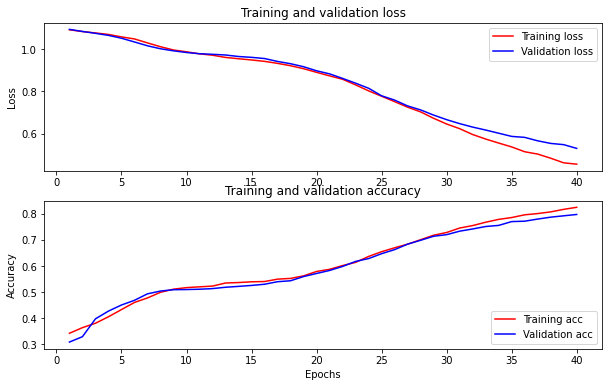

In [ ]:
plot(history)

In [ ]:
probs = model1.predict(X_test_twitter)
y_pred = convert(probs)
probs

array([[0.9750583 , 0.01926299, 0.00567876],
       [0.01457787, 0.04588499, 0.93953717],
       [0.0044922 , 0.96532416, 0.03018369],
       ...,
       [0.00547249, 0.90317035, 0.09135724],
       [0.20353033, 0.74081033, 0.05565939],
       [0.00885612, 0.9875831 , 0.00356073]], dtype=float32)

In [ ]:
y_pred = convert(probs)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_twitter, y_pred, labels=[0, 1, 2])
cm

array([[ 935,  100,   99],
       [  87, 1141,  135],
       [  97,  152,  554]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_twitter, y_pred, target_names=["0", "1", "2"]))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1134
           1       0.82      0.84      0.83      1363
           2       0.70      0.69      0.70       803

    accuracy                           0.80      3300
   macro avg       0.79      0.78      0.78      3300
weighted avg       0.80      0.80      0.80      3300



### Using the BERT model - talking heads


#### Variables

In [ ]:
epochs = 40
steps_per_epoch = X_train_twitter.shape[0]
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5

#### Defining model1: simple_classifier

In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

metrics = tf.metrics.CategoricalAccuracy()

optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
def simple_classifier():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(3, activation='softmax', name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
model1 = simple_classifier()

model1.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

print(f'Training model with {tfhub_handle_encoder}')
history = model1.fit(x=X_train_twitter,
                    y=y_train_twitter_one_hot,
                    validation_data= (X_test_twitter, y_test_twitter_one_hot),
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1
Epoch 1/40


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


210/210 [==============================] - 26s 97ms/step - loss: 1.4211 - categorical_accuracy: 0.3695 - val_loss: 1.4110 - val_categorical_accuracy: 0.3755
Epoch 2/40
210/210 [==============================] - 20s 95ms/step - loss: 1.3892 - categorical_accuracy: 0.3710 - val_loss: 1.3449 - val_categorical_accuracy: 0.3812
Epoch 3/40
210/210 [==============================] - 20s 96ms/step - loss: 1.3049 - categorical_accuracy: 0.3769 - val_loss: 1.2502 - val_categorical_accuracy: 0.3952
Epoch 4/40
210/210 [==============================] - 21s 99ms/step - loss: 1.2271 - categorical_accuracy: 0.3829 - val_loss: 1.1587 - val_categorical_accuracy: 0.4018
Epoch 5/40
210/210 [==============================] - 21s 101ms/step - loss: 1.1679 - categorical_accuracy: 0.3880 - val_loss: 1.1050 - val_categorical_accuracy: 0.4145
Epoch 6/40
210/210 [==============================] - 20s 96ms/step - loss: 1.1341 - categorical_accuracy: 0.4021 - val_loss: 1.0738 - val_categorical_accuracy: 0.4170
Ep

In [ ]:
loss, accuracy = model1.evaluate(X_test_twitter, y_test_twitter_one_hot)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

104/104 [==============================] - 6s 59ms/step - loss: 0.5494 - categorical_accuracy: 0.7936
Loss: 0.5493671894073486
Accuracy: 0.7936363816261292


{'loss': [1.421095371246338, 1.3892455101013184, 1.304858684539795, 1.2271270751953125, 1.167891502380371, 1.1341476440429688, 1.1128724813461304, 1.0902538299560547, 1.0728305578231812, 1.0513746738433838, 1.0376476049423218, 1.0251026153564453, 1.019249677658081, 0.9979211688041687, 0.9936042428016663, 0.9846006035804749, 0.9710614681243896, 0.9637587070465088, 0.9452018737792969, 0.9261883497238159, 0.9125314950942993, 0.8864683508872986, 0.8599672317504883, 0.8345648050308228, 0.7972212433815002, 0.7719042301177979, 0.7430183291435242, 0.7151764631271362, 0.6898677945137024, 0.6815624237060547, 0.6529274582862854, 0.6207950711250305, 0.6058117151260376, 0.5930428504943848, 0.5735301971435547, 0.5500625371932983, 0.5448030233383179, 0.5245704054832458, 0.5021024346351624, 0.48626503348350525], 'categorical_accuracy': [0.3694581389427185, 0.3709508776664734, 0.3769219219684601, 0.3828929662704468, 0.38796836137771606, 0.40214958786964417, 0.4106582999229431, 0.4291685223579407, 0.444

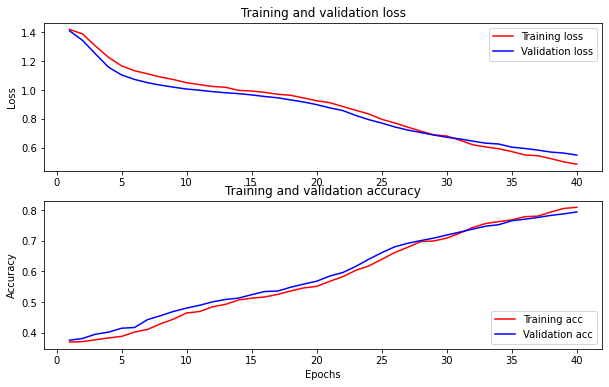

In [ ]:
plot(history)

In [ ]:
probs = model1.predict(X_test_twitter)
y_pred = convert(probs)
probs

array([[0.96721864, 0.01746893, 0.01531234],
       [0.01295251, 0.02042657, 0.9666209 ],
       [0.00303893, 0.97131497, 0.02564611],
       ...,
       [0.00231945, 0.94388   , 0.05380054],
       [0.17462671, 0.781403  , 0.04397033],
       [0.00664889, 0.98050183, 0.01284928]], dtype=float32)

In [ ]:
y_pred = convert(probs)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_twitter, y_pred, labels=[0, 1, 2])
cm

array([[ 947,   92,   95],
       [  84, 1164,  115],
       [ 107,  188,  508]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_twitter, y_pred, target_names=["0", "1", "2"]))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1134
           1       0.81      0.85      0.83      1363
           2       0.71      0.63      0.67       803

    accuracy                           0.79      3300
   macro avg       0.78      0.77      0.78      3300
weighted avg       0.79      0.79      0.79      3300



#### Defining model2: complex_classifier

In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

metrics = tf.metrics.CategoricalAccuracy()

optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
def complex_classifier():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(100, activation='relu', name='extra')(net)
  net = tf.keras.layers.Dense(3, activation='softmax', name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
model1 = complex_classifier()

model1.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

print(f'Training model with {tfhub_handle_encoder}')
history = model1.fit(x=X_train_twitter,
                    y=y_train_twitter_one_hot,
                    validation_data= (X_test_twitter, y_test_twitter_one_hot),
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1
Epoch 1/40


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


210/210 [==============================] - 30s 107ms/step - loss: 1.4367 - categorical_accuracy: 0.3360 - val_loss: 1.4487 - val_categorical_accuracy: 0.3391
Epoch 2/40
210/210 [==============================] - 20s 95ms/step - loss: 1.4041 - categorical_accuracy: 0.3396 - val_loss: 1.3888 - val_categorical_accuracy: 0.3376
Epoch 3/40
210/210 [==============================] - 20s 96ms/step - loss: 1.3371 - categorical_accuracy: 0.3421 - val_loss: 1.2960 - val_categorical_accuracy: 0.3382
Epoch 4/40
210/210 [==============================] - 20s 96ms/step - loss: 1.2364 - categorical_accuracy: 0.3423 - val_loss: 1.1882 - val_categorical_accuracy: 0.3367
Epoch 5/40
210/210 [==============================] - 21s 98ms/step - loss: 1.1499 - categorical_accuracy: 0.3678 - val_loss: 1.1035 - val_categorical_accuracy: 0.3858
Epoch 6/40
210/210 [==============================] - 20s 96ms/step - loss: 1.0980 - categorical_accuracy: 0.4060 - val_loss: 1.0658 - val_categorical_accuracy: 0.4627
Ep

In [ ]:
loss, accuracy = model1.evaluate(X_test_twitter, y_test_twitter_one_hot)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

104/104 [==============================] - 6s 59ms/step - loss: 0.5562 - categorical_accuracy: 0.7936
Loss: 0.5561803579330444
Accuracy: 0.7936363816261292


{'loss': [1.436736822128296, 1.4041210412979126, 1.3370734453201294, 1.2364192008972168, 1.1499035358428955, 1.0980151891708374, 1.0757397413253784, 1.0563844442367554, 1.0464580059051514, 1.0250462293624878, 1.019701361656189, 1.0072283744812012, 0.994234561920166, 0.9834904074668884, 0.9762405753135681, 0.9684780240058899, 0.9527717232704163, 0.9418258666992188, 0.9389895796775818, 0.9187107682228088, 0.9021140933036804, 0.8714480400085449, 0.8567622900009155, 0.8328346014022827, 0.8092354536056519, 0.7787916660308838, 0.7619736194610596, 0.7314514517784119, 0.7102982401847839, 0.6888668537139893, 0.6627690196037292, 0.6455973386764526, 0.6257133483886719, 0.6088250279426575, 0.5827546119689941, 0.5779144167900085, 0.5533826351165771, 0.534451425075531, 0.519083559513092, 0.4969787001609802], 'categorical_accuracy': [0.336020290851593, 0.33960291743278503, 0.3421406149864197, 0.34228989481925964, 0.36781609058380127, 0.4060307443141937, 0.4454396069049835, 0.46230781078338623, 0.4796

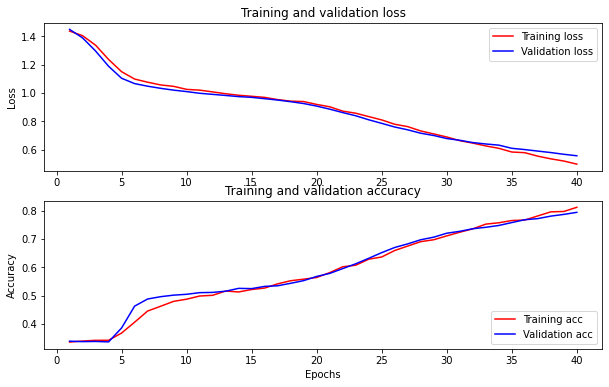

In [ ]:
plot(history)

In [ ]:
probs = model1.predict(X_test_twitter)
y_pred = convert(probs)
probs

array([[0.94777566, 0.03373243, 0.01849196],
       [0.01257209, 0.06524926, 0.9221786 ],
       [0.01078727, 0.9512525 , 0.03796026],
       ...,
       [0.01340607, 0.934099  , 0.05249498],
       [0.4083536 , 0.40487087, 0.18677555],
       [0.00927278, 0.98052144, 0.01020573]], dtype=float32)

In [ ]:
y_pred = convert(probs)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_twitter, y_pred, labels=[0, 1, 2])
cm

array([[ 934,  113,   87],
       [  90, 1161,  112],
       [ 105,  174,  524]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_twitter, y_pred, target_names=["0", "1", "2"]))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1134
           1       0.80      0.85      0.83      1363
           2       0.72      0.65      0.69       803

    accuracy                           0.79      3300
   macro avg       0.78      0.78      0.78      3300
weighted avg       0.79      0.79      0.79      3300



#### Defining model3: morecomplex_classifier

In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

metrics = tf.metrics.CategoricalAccuracy()

optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
def mcomplex_classifier():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1000, activation='relu', name='extra')(net)
  net = tf.keras.layers.Dense(1000, activation='relu', name='extra2')(net)
  net = tf.keras.layers.Dense(3, activation='softmax', name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
model1 = mcomplex_classifier()

model1.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

print(f'Training model with {tfhub_handle_encoder}')
history = model1.fit(x=X_train_twitter,
                    y=y_train_twitter_one_hot,
                    validation_data= (X_test_twitter, y_test_twitter_one_hot),
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1
Epoch 1/40


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


210/210 [==============================] - 31s 106ms/step - loss: 1.0873 - categorical_accuracy: 0.4129 - val_loss: 1.0829 - val_categorical_accuracy: 0.4121
Epoch 2/40
210/210 [==============================] - 20s 97ms/step - loss: 1.0842 - categorical_accuracy: 0.4120 - val_loss: 1.0762 - val_categorical_accuracy: 0.4106
Epoch 3/40
210/210 [==============================] - 20s 97ms/step - loss: 1.0764 - categorical_accuracy: 0.4095 - val_loss: 1.0674 - val_categorical_accuracy: 0.4121
Epoch 4/40
210/210 [==============================] - 20s 98ms/step - loss: 1.0686 - categorical_accuracy: 0.4166 - val_loss: 1.0566 - val_categorical_accuracy: 0.4227
Epoch 5/40
210/210 [==============================] - 20s 98ms/step - loss: 1.0563 - categorical_accuracy: 0.4405 - val_loss: 1.0436 - val_categorical_accuracy: 0.4500
Epoch 6/40
210/210 [==============================] - 21s 98ms/step - loss: 1.0424 - categorical_accuracy: 0.4698 - val_loss: 1.0274 - val_categorical_accuracy: 0.4803
Ep

In [ ]:
loss, accuracy = model1.evaluate(X_test_twitter, y_test_twitter_one_hot)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

104/104 [==============================] - 6s 60ms/step - loss: 0.5356 - categorical_accuracy: 0.7936
Loss: 0.5355640649795532
Accuracy: 0.7936363816261292


{'loss': [1.0873196125030518, 1.0841953754425049, 1.0764195919036865, 1.0685540437698364, 1.056255578994751, 1.0423774719238281, 1.0254672765731812, 1.0073491334915161, 0.9967126250267029, 0.985595166683197, 0.9768378734588623, 0.968181848526001, 0.9650609493255615, 0.9580535888671875, 0.94917231798172, 0.9353699684143066, 0.9291822910308838, 0.9210091829299927, 0.9051963686943054, 0.8850017786026001, 0.8701674342155457, 0.8534093499183655, 0.8270084857940674, 0.8085691332817078, 0.7774837613105774, 0.7536942362785339, 0.7358332276344299, 0.6942061185836792, 0.6760192513465881, 0.6539617776870728, 0.6261237859725952, 0.6067661046981812, 0.5817703008651733, 0.5629698038101196, 0.5390146374702454, 0.526921808719635, 0.5104248523712158, 0.49347734451293945, 0.47121661901474, 0.4595290720462799], 'categorical_accuracy': [0.4128974378108978, 0.4120017886161804, 0.4094640910625458, 0.4166293442249298, 0.4405135214328766, 0.4697715938091278, 0.4885803759098053, 0.5039558410644531, 0.513808012

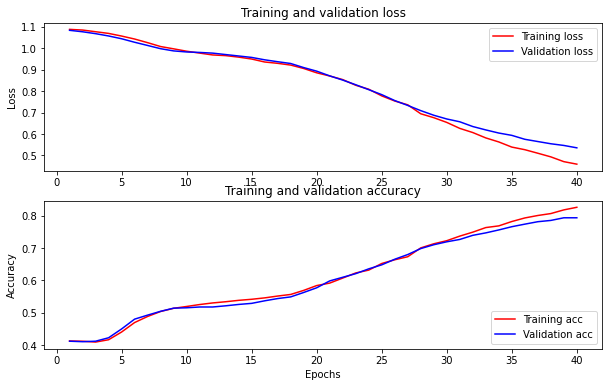

In [ ]:
plot(history)

In [ ]:
probs = model1.predict(X_test_twitter)
y_pred = convert(probs)
probs

array([[0.9678976 , 0.0250874 , 0.00701501],
       [0.0164724 , 0.02750731, 0.95602036],
       [0.00638873, 0.9334441 , 0.06016716],
       ...,
       [0.00521273, 0.87654746, 0.11823988],
       [0.22509643, 0.7286248 , 0.04627873],
       [0.01798909, 0.97304934, 0.00896153]], dtype=float32)

In [ ]:
y_pred = convert(probs)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_twitter, y_pred, labels=[0, 1, 2])
cm

array([[ 925,   98,  111],
       [  79, 1125,  159],
       [  91,  143,  569]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_twitter, y_pred, target_names=["0", "1", "2"]))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1134
           1       0.82      0.83      0.82      1363
           2       0.68      0.71      0.69       803

    accuracy                           0.79      3300
   macro avg       0.78      0.78      0.78      3300
weighted avg       0.80      0.79      0.79      3300

